In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# ticker = "MSFT"  # Example: Apple stock
# df = yf.download(ticker, period="60d", interval="2m")



ticker = "MSFT"  # Example: Apple stock
df = yf.download(ticker, period='60d', interval="2m")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df

Price                           Close        High         Low        Open  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Datetime                                                                    
2025-03-03 14:30:00+00:00  396.850006  398.820007  396.179993  398.820007   
2025-03-03 14:32:00+00:00  396.725494  398.000000  396.709503  396.929993   
2025-03-03 14:34:00+00:00  396.130005  397.429993  396.130005  396.660004   
2025-03-03 14:36:00+00:00  396.285004  396.515015  395.630005  396.144989   
2025-03-03 14:38:00+00:00  394.730011  396.356293  394.309998  396.336212   
...                               ...         ...         ...         ...   
2025-04-16 17:18:00+00:00  377.140015  377.209991  376.869995  376.940002   
2025-04-16 17:20:00+00:00  377.415009  377.470001  377.109985  377.140015   
2025-04-16 17:22:00+00:00  376.684998  377.500000  376.579987  377.309998   
2025-04-16 17:24:00+00:00  376.839996  376.890015  376.559998  376.600006   
2025-04-16 17:26:00+00:00  376.859985  376.859985  376.859985  376.859985   

Price                      Volume  
Ticker                       MSFT  
Datetime                           
2025-03-03 14:30:00+00:00  958102  
2025-03-03 14:32:00+00:00  158200  
2025-03-03 14:34:00+00:00  164374  
2025-03-03 14:36:00+00:00  134144  
2025-03-03 14:38:00+00:00  208410  
...                           ...  
2025-04-16 17:18:00+00:00   42619  
2025-04-16 17:20:00+00:00   37022  
2025-04-16 17:22:00+00:00   49613  
2025-04-16 17:24:00+00:00   36968  
2025-04-16 17:26:00+00:00       0  

[6345 rows x 5 columns]

In [4]:
df.columns = [i[0] for i in df.columns]

In [5]:
df

Close        High         Low        Open  \
Datetime                                                                    
2025-03-03 14:30:00+00:00  396.850006  398.820007  396.179993  398.820007   
2025-03-03 14:32:00+00:00  396.725494  398.000000  396.709503  396.929993   
2025-03-03 14:34:00+00:00  396.130005  397.429993  396.130005  396.660004   
2025-03-03 14:36:00+00:00  396.285004  396.515015  395.630005  396.144989   
2025-03-03 14:38:00+00:00  394.730011  396.356293  394.309998  396.336212   
...                               ...         ...         ...         ...   
2025-04-16 17:18:00+00:00  377.140015  377.209991  376.869995  376.940002   
2025-04-16 17:20:00+00:00  377.415009  377.470001  377.109985  377.140015   
2025-04-16 17:22:00+00:00  376.684998  377.500000  376.579987  377.309998   
2025-04-16 17:24:00+00:00  376.839996  376.890015  376.559998  376.600006   
2025-04-16 17:26:00+00:00  376.859985  376.859985  376.859985  376.859985   

                           Volume  
Datetime                           
2025-03-03 14:30:00+00:00  958102  
2025-03-03 14:32:00+00:00  158200  
2025-03-03 14:34:00+00:00  164374  
2025-03-03 14:36:00+00:00  134144  
2025-03-03 14:38:00+00:00  208410  
...                           ...  
2025-04-16 17:18:00+00:00   42619  
2025-04-16 17:20:00+00:00   37022  
2025-04-16 17:22:00+00:00   49613  
2025-04-16 17:24:00+00:00   36968  
2025-04-16 17:26:00+00:00       0  

[6345 rows x 5 columns]

In [11]:
# Simulating the structure of the dataset based on the given format
import pandas as pd
import numpy as np

# Function to compute RSI
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to compute MACD
def compute_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

# Compute Indicators
df["SMA_10"] = df["High"].rolling(window=10).mean()
df["EMA_10"] = df["High"].ewm(span=10, adjust=False).mean()
df["RSI_14"] = compute_rsi(df["High"], window=14)
df["MACD"], df["Signal_Line"] = compute_macd(df["High"])
df["BB_Mid"] = df["High"].rolling(window=20).mean()
df["BB_Std"] = df["High"].rolling(window=20).std()
df["BB_Upper"] = df["BB_Mid"] + (df["BB_Std"] * 2)
df["BB_Lower"] = df["BB_Mid"] - (df["BB_Std"] * 2)

price_volume = (df["High"] * df["Volume"]).rolling(window=20).sum().shift(1)
volume_sum = df["Volume"].rolling(window=20).sum().shift(1)
df["VWAP"] = price_volume / volume_sum


fib_window = 26  # adjust to match your feature engineering style

rolling_high = df["High"].rolling(window=fib_window).max().shift(1)
rolling_low = df["Low"].rolling(window=fib_window).min().shift(1)

df["Fib_23.6"] = rolling_low + 0.236 * (rolling_high - rolling_low)
df["Fib_38.2"] = rolling_low + 0.382 * (rolling_high - rolling_low)
df["Fib_61.8"] = rolling_low + 0.618 * (rolling_high - rolling_low)

df.drop(columns=["BB_Std"], inplace=True)

# Shift indicators to prevent data leakage

for col in ["SMA_10", "EMA_10", "RSI_14", "MACD", "Signal_Line", "VWAP", "BB_Mid", "BB_Upper", "BB_Lower"]:
    df[col] = df[col].shift(1)

# Drop NaN values resulting from rolling calculations
df.dropna(inplace=True)


In [13]:
df

Close        High         Low        Open  \
Datetime                                                                    
2025-03-03 15:22:00+00:00  394.140015  394.535187  393.691193  393.820007   
2025-03-03 15:24:00+00:00  394.054993  394.479889  393.859985  394.220001   
2025-03-03 15:26:00+00:00  394.425995  394.750000  393.859985  394.054993   
2025-03-03 15:28:00+00:00  394.625000  394.682007  394.149994  394.429993   
2025-03-03 15:30:00+00:00  394.350006  395.000000  394.279999  394.614990   
...                               ...         ...         ...         ...   
2025-04-16 17:18:00+00:00  377.140015  377.209991  376.869995  376.940002   
2025-04-16 17:20:00+00:00  377.415009  377.470001  377.109985  377.140015   
2025-04-16 17:22:00+00:00  376.684998  377.500000  376.579987  377.309998   
2025-04-16 17:24:00+00:00  376.839996  376.890015  376.559998  376.600006   
2025-04-16 17:26:00+00:00  376.859985  376.859985  376.859985  376.859985   

                           Volume      SMA_10      EMA_10     RSI_14  \
Datetime                                                               
2025-03-03 15:22:00+00:00  106536  393.762250  393.936588  39.770921   
2025-03-03 15:24:00+00:00   79951  393.867767  394.045424  50.510883   
2025-03-03 15:26:00+00:00   86296  393.931757  394.124418  54.943700   
2025-03-03 15:28:00+00:00   63936  394.030756  394.238160  53.436186   
2025-03-03 15:30:00+00:00   97494  394.175806  394.318859  57.839074   
...                           ...         ...         ...        ...   
2025-04-16 17:18:00+00:00   42619  377.111221  377.050229  40.556356   
2025-04-16 17:20:00+00:00   37022  377.095612  377.079277  41.634371   
2025-04-16 17:22:00+00:00   49613  377.082611  377.150318  47.959784   
2025-04-16 17:24:00+00:00   36968  377.073032  377.213896  45.560280   
2025-04-16 17:26:00+00:00       0  377.025534  377.155009  37.293016   

                               MACD  Signal_Line      BB_Mid    BB_Upper  \
Datetime                                                                   
2025-03-03 15:22:00+00:00 -0.947974    -1.037332  394.425993  396.327067   
2025-03-03 15:24:00+00:00 -0.839062    -0.997678  394.354878  396.115990   
2025-03-03 15:26:00+00:00 -0.748581    -0.947859  394.290373  395.923069   
2025-03-03 15:28:00+00:00 -0.647614    -0.887810  394.222878  395.637669   
2025-03-03 15:30:00+00:00 -0.566552    -0.823558  394.154478  395.304917   
...                             ...          ...         ...         ...   
2025-04-16 17:18:00+00:00 -0.215022    -0.151959  377.326779  378.064126   
2025-04-16 17:20:00+00:00 -0.190164    -0.159600  377.332779  378.063940   
2025-04-16 17:22:00+00:00 -0.147779    -0.157236  377.336800  378.070157   
2025-04-16 17:24:00+00:00 -0.110495    -0.147888  377.327800  378.047719   
2025-04-16 17:26:00+00:00 -0.128684    -0.144047  377.284801  378.001264   

                             BB_Lower        VWAP    Fib_23.6    Fib_38.2  \
Datetime                                                                    
2025-03-03 15:22:00+00:00  392.524919  394.680206  393.720293  394.694846   
2025-03-03 15:24:00+00:00  392.593767  394.542172  393.526772  394.381603   
2025-03-03 15:26:00+00:00  392.657677  394.467633  393.392250  394.163860   
2025-03-03 15:28:00+00:00  392.808086  394.398890  393.176315  393.814339   
2025-03-03 15:30:00+00:00  393.004040  394.291776  393.138857  393.753707   
...                               ...         ...         ...         ...   
2025-04-16 17:18:00+00:00  376.589433  377.342211  376.604000  376.823000   
2025-04-16 17:20:00+00:00  376.601618  377.318328  376.604000  376.823000   
2025-04-16 17:22:00+00:00  376.603442  377.319674  376.604000  376.823000   
2025-04-16 17:24:00+00:00  376.607881  377.323809  376.604000  376.823000   
2025-04-16 17:26:00+00:00  376.568337  377.317140  376.604000  376.823000   

                             Fib_61.8  
Datetime                               
2025-03-03 15:22:00+00

In [15]:
# Function to convert dataset into sliding window format for training/testing
def create_sliding_window_data(df, target_col="High", window_size=5):
    """
    Converts time-series stock data into feature-target format using a sliding window approach.
    
    Parameters:
    - df: DataFrame containing stock data with indicators.
    - target_col: The column we want to predict (default: "Open").
    - window_size: Number of past time steps to use as features.
    
    Returns:
    - X: Feature dataset (numpy array of shape [num_samples, window_size, num_features]).
    - y: Target values (numpy array of shape [num_samples,]).
    """
    feature_cols = [col for col in df.columns if col != target_col]  # Exclude target column
    X, y = [], []

    for i in range(len(df) - window_size):
        X.append(df.iloc[i : i + window_size][feature_cols].values)  # Past `window_size` records
        y.append(df.iloc[i + window_size][target_col])  # Next step's Open price

    return np.array(X), np.array(y)



# Define sliding window size
window_size = 5  # Using last 10 time steps as features

# Create training/testing datasets
X, y = create_sliding_window_data(df, target_col="High", window_size=window_size)

# Split into train and test sets (80% train, 20% test)
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4419, 5, 16), (1895, 5, 16), (4419,), (1895,))

In [16]:
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [17]:
# Re-import necessary libraries since execution state was reset
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import shap

# Flatten the 3D feature array (needed for models like XGBoost and RandomForest)
# X_train_flat = X_train.reshape(X_train.shape[0], -1)
# X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train XGBoost model for feature importance analysis
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    tree_method="hist",  # Use histogram-based algorithm (works with GPU)
    device="cuda",  # Enable GPU acceleration
    random_state=42
)
# xgb_model.fit(X_train_flat, y_train)
# xgb_preds = xgb_model.predict(X_test_flat)
# xgb_mae = mean_absolute_error(y_test, xgb_preds)

xgb_model.fit(X_train_flat, y_train)
xgb_preds = xgb_model.predict(X_test_flat)
xgb_mae = mean_absolute_error(y_test, xgb_preds)



C:\Users\shubb\anaconda3\Lib\site-packages\xgboost\core.py:729: UserWarning: [10:26:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [18]:

# Train RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)
rf_preds = rf_model.predict(X_test_flat)
rf_mae = mean_absolute_error(y_test, rf_preds)


In [20]:

# Train Lasso Regression for feature selection
lasso_model = Lasso(alpha=0.1)  # Regularization strength can be tuned
lasso_model.fit(X_train_flat, y_train)
lasso_preds = lasso_model.predict(X_test_flat)
lasso_mae = mean_absolute_error(y_test, lasso_preds)


C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.339e+02, tolerance: 1.825e+01
  model = cd_fast.enet_coordinate_descent(


 94%|=================== | 1855/1967 [00:12<00:00]       

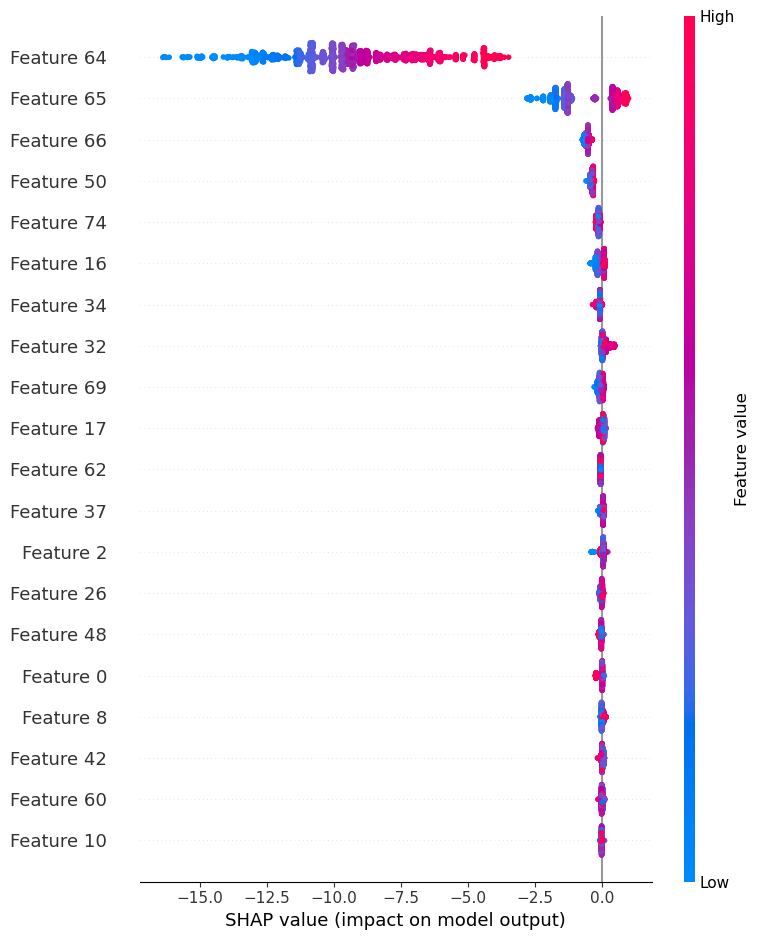

In [106]:

# # SHAP analysis for feature importance on XGBoost model
# explainer = shap.Explainer(xgb_model, X_train_flat)
# shap_values = explainer(X_test_flat)

# # Display SHAP summary plot (Feature Importance Visualization)
# shap.summary_plot(shap_values, X_test_flat)

In [24]:
# Re-import necessary libraries since execution state was reset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics for each model
performance_metrics = {
    "Model": ["XGBoost", "Random Forest", "Lasso Regression"],
    "MAE": [mean_absolute_error(y_test, xgb_preds), 
            mean_absolute_error(y_test, rf_preds), 
            mean_absolute_error(y_test, lasso_preds)],
    "MSE": [mean_squared_error(y_test, xgb_preds), 
            mean_squared_error(y_test, rf_preds), 
            mean_squared_error(y_test, lasso_preds)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, xgb_preds)), 
             np.sqrt(mean_squared_error(y_test, rf_preds)), 
             np.sqrt(mean_squared_error(y_test, lasso_preds))],
    "R2 Score": [r2_score(y_test, xgb_preds), 
                 r2_score(y_test, rf_preds), 
                 r2_score(y_test, lasso_preds)]
}

# Convert metrics to DataFrame
performance_df = pd.DataFrame(performance_metrics)

performance_df

Model       MAE        MSE      RMSE  R2 Score
0           XGBoost  2.744193  24.992993  4.999299  0.805056
1     Random Forest  2.597173  22.988739  4.794657  0.820689
2  Lasso Regression  0.378153   0.587834  0.766704  0.995415

C:\Users\shubb\AppData\Local\Temp\ipykernel_35124\330310100.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\shubb\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


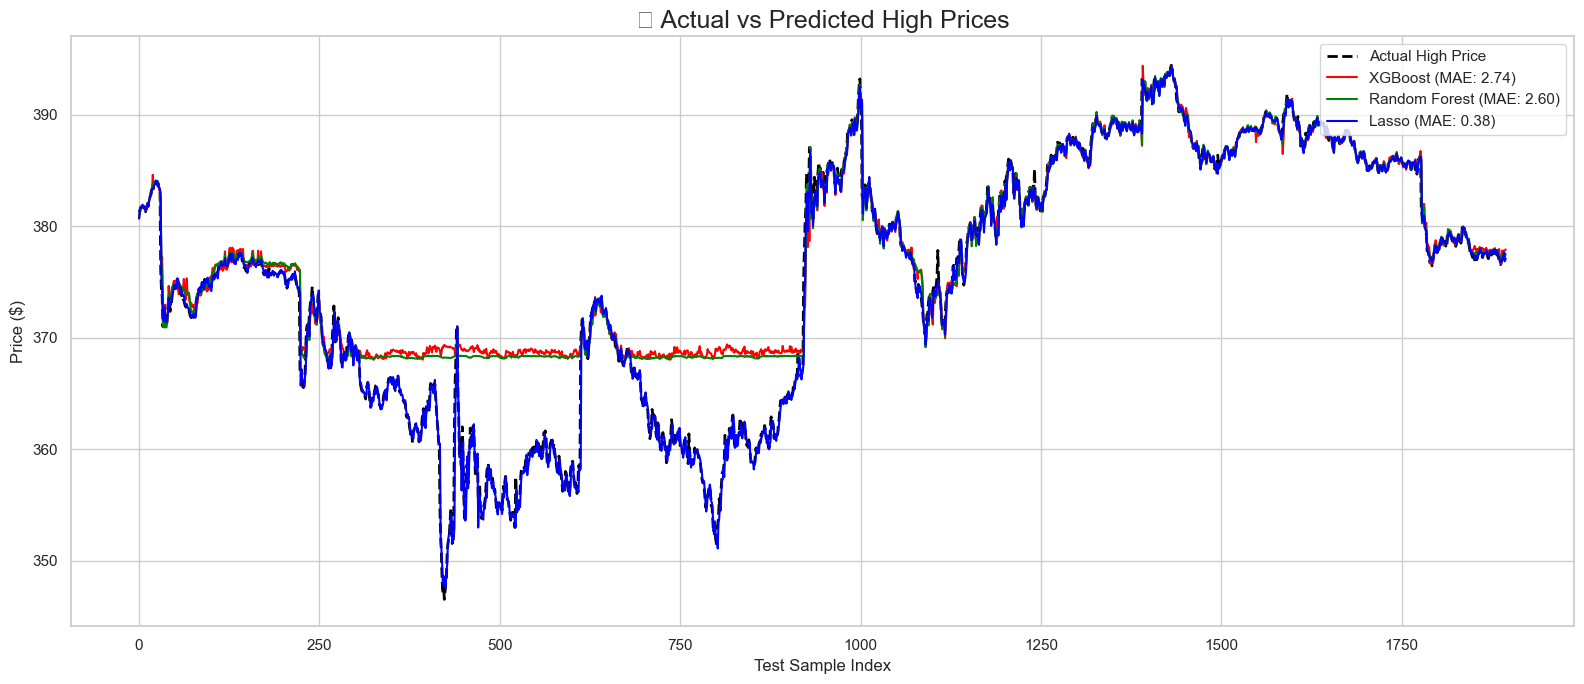

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Plot actual vs predicted values
plt.figure(figsize=(16, 7))
plt.plot(y_test, label="Actual High Price", color="black", linestyle="--", linewidth=2)

# Plot each model's predictions
plt.plot(xgb_preds, label=f"XGBoost (MAE: {performance_df['MAE'][0]:.2f})", color="red", alpha=1)
plt.plot(rf_preds, label=f"Random Forest (MAE: {performance_df['MAE'][1]:.2f})", color="green", alpha=1)
plt.plot(lasso_preds, label=f"Lasso (MAE: {performance_df['MAE'][2]:.2f})", color="blue", alpha=1)

plt.title("📈 Actual vs Predicted High Prices", fontsize=18)
plt.xlabel("Test Sample Index", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.legend(loc="upper right", fontsize=11)
plt.tight_layout()
plt.show()


C:\Users\shubb\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


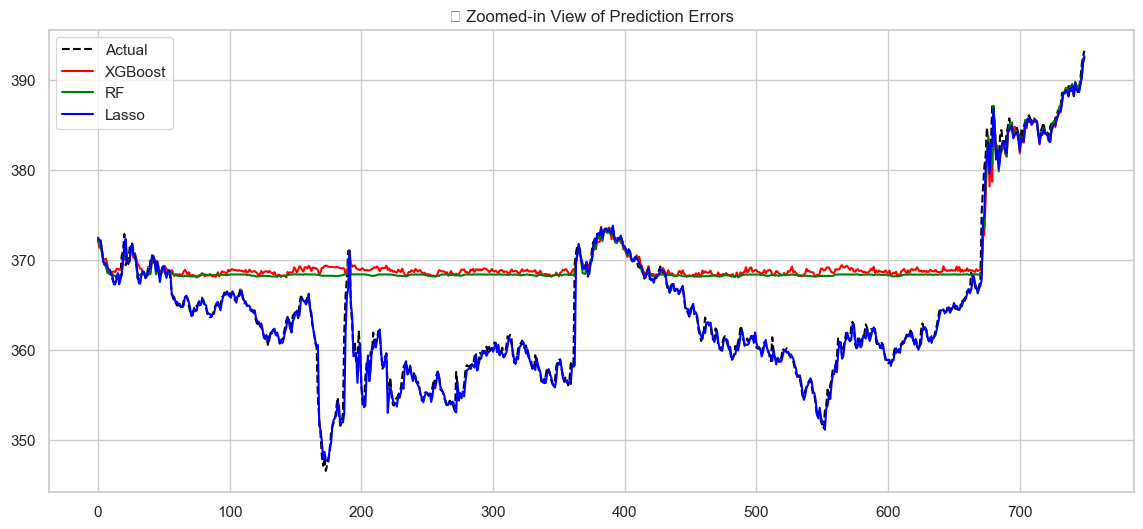

In [40]:
zoom_range = slice(250, 1000)  # Change this range to zoom into any interesting region

plt.figure(figsize=(14, 6))
plt.plot(y_test[zoom_range], label="Actual", color="black", linestyle="--")
plt.plot(xgb_preds[zoom_range], label="XGBoost", color="red")
plt.plot(rf_preds[zoom_range], label="RF", color="green")
plt.plot(lasso_preds[zoom_range], label="Lasso", color="blue")
plt.title("🔍 Zoomed-in View of Prediction Errors")
plt.legend()
plt.show()


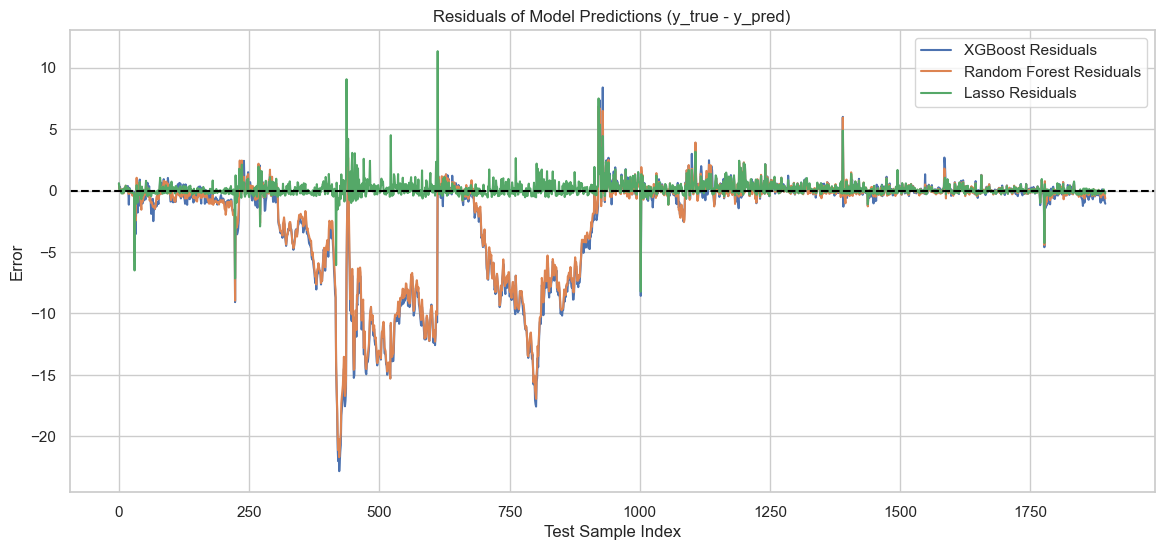

In [34]:
errors = {
    "XGBoost": y_test - xgb_preds,
    "Random Forest": y_test - rf_preds,
    "Lasso": y_test - lasso_preds
}

plt.figure(figsize=(14, 6))
for model, err in errors.items():
    plt.plot(err, label=f"{model} Residuals")
    
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of Model Predictions (y_true - y_pred)")
plt.ylabel("Error")
plt.xlabel("Test Sample Index")
plt.legend()
plt.show()


In [42]:
def train_and_evaluate_models(df, target_col="High", window_size=5, alpha=0.1, n_estimators=100):
    """
    Trains and evaluates XGBoost, Random Forest, and Lasso Regression on stock data using a sliding window approach.

    Parameters:
    - df: DataFrame containing stock data with indicators.
    - target_col: Column to predict (default: "High").
    - window_size: Number of past time steps to use as features (default: 5).
    - alpha: Regularization strength for Lasso Regression (default: 0.1).
    - n_estimators: Number of trees for XGBoost and Random Forest (default: 100).

    Returns:
    - performance_df: DataFrame containing evaluation metrics for all models.
    """

    import pandas as pd
    import numpy as np
    import xgboost as xgb
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import Lasso
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set(style='whitegrid')

    # Helper: Create sliding window dataset
    def create_sliding_window_data(df, target_col, window_size):
        feature_cols = [col for col in df.columns if col != target_col]
        X, y = [], []

        for i in range(len(df) - window_size):
            X.append(df.iloc[i : i + window_size][feature_cols].values)
            y.append(df.iloc[i + window_size][target_col])

        return np.array(X), np.array(y)

    # Step 1: Generate feature/target data
    X, y = create_sliding_window_data(df, target_col, window_size)

    # Step 2: Split into train/test sets
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Step 3: Flatten features for ML models
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Step 4: Train models
    xgb_model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        tree_method="hist",
        device="cuda",
        random_state=42
    )
    xgb_model.fit(X_train_flat, y_train)
    xgb_preds = xgb_model.predict(X_test_flat)

    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train_flat, y_train)
    rf_preds = rf_model.predict(X_test_flat)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_flat, y_train)
    lasso_preds = lasso_model.predict(X_test_flat)

    # Step 5: Evaluate
    performance_df = pd.DataFrame({
        "Model": ["XGBoost", "Random Forest", "Lasso Regression"],
        "MAE": [mean_absolute_error(y_test, xgb_preds), 
                mean_absolute_error(y_test, rf_preds), 
                mean_absolute_error(y_test, lasso_preds)],
        "MSE": [mean_squared_error(y_test, xgb_preds), 
                mean_squared_error(y_test, rf_preds), 
                mean_squared_error(y_test, lasso_preds)],
        "RMSE": [np.sqrt(mean_squared_error(y_test, xgb_preds)), 
                 np.sqrt(mean_squared_error(y_test, rf_preds)), 
                 np.sqrt(mean_squared_error(y_test, lasso_preds))],
        "R2 Score": [r2_score(y_test, xgb_preds), 
                     r2_score(y_test, rf_preds), 
                     r2_score(y_test, lasso_preds)]
    })

    print(performance_df)

    # Step 6: Plot actual vs. predicted values
    plt.figure(figsize=(16, 7))
    plt.plot(y_test, label="Actual High Price", color="black", linestyle="--", linewidth=2)
    plt.plot(xgb_preds, label=f"XGBoost (MAE: {performance_df['MAE'][0]:.2f})", color="red", alpha=1)
    plt.plot(rf_preds, label=f"Random Forest (MAE: {performance_df['MAE'][1]:.2f})", color="green", alpha=1)
    plt.plot(lasso_preds, label=f"Lasso (MAE: {performance_df['MAE'][2]:.2f})", color="blue", alpha=1)
    plt.title("Actual vs Predicted High Prices", fontsize=18)
    plt.xlabel("Test Sample Index", fontsize=12)
    plt.ylabel("Price ($)", fontsize=12)
    plt.legend(loc="upper right", fontsize=11)
    plt.tight_layout()
    plt.show()

    # Step 7: Zoomed-in plot
    zoom_range = slice(250, 1000)  # Modify this if needed
    plt.figure(figsize=(14, 6))
    plt.plot(y_test[zoom_range], label="Actual", color="black", linestyle="--")
    plt.plot(xgb_preds[zoom_range], label="XGBoost", color="red")
    plt.plot(rf_preds[zoom_range], label="RF", color="green")
    plt.plot(lasso_preds[zoom_range], label="Lasso", color="blue")
    plt.title("Zoomed-in View of Prediction Errors")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()

    # Step 8: Residuals
    errors = {
        "XGBoost": y_test - xgb_preds,
        "Random Forest": y_test - rf_preds,
        "Lasso": y_test - lasso_preds
    }

    plt.figure(figsize=(14, 6))
    for model, err in errors.items():
        plt.plot(err, label=f"{model} Residuals")
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Residuals of Model Predictions (y_true - y_pred)")
    plt.ylabel("Error")
    plt.xlabel("Test Sample Index")
    plt.legend()
    plt.show()

    return performance_df


C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.054e+03, tolerance: 4.366e+01
  model = cd_fast.enet_coordinate_descent(


              Model       MAE       MSE      RMSE  R2 Score
0           XGBoost  0.449644  0.673354  0.820582  0.993759
1     Random Forest  0.410062  0.519014  0.720426  0.995190
2  Lasso Regression  0.349032  0.413025  0.642670  0.996172


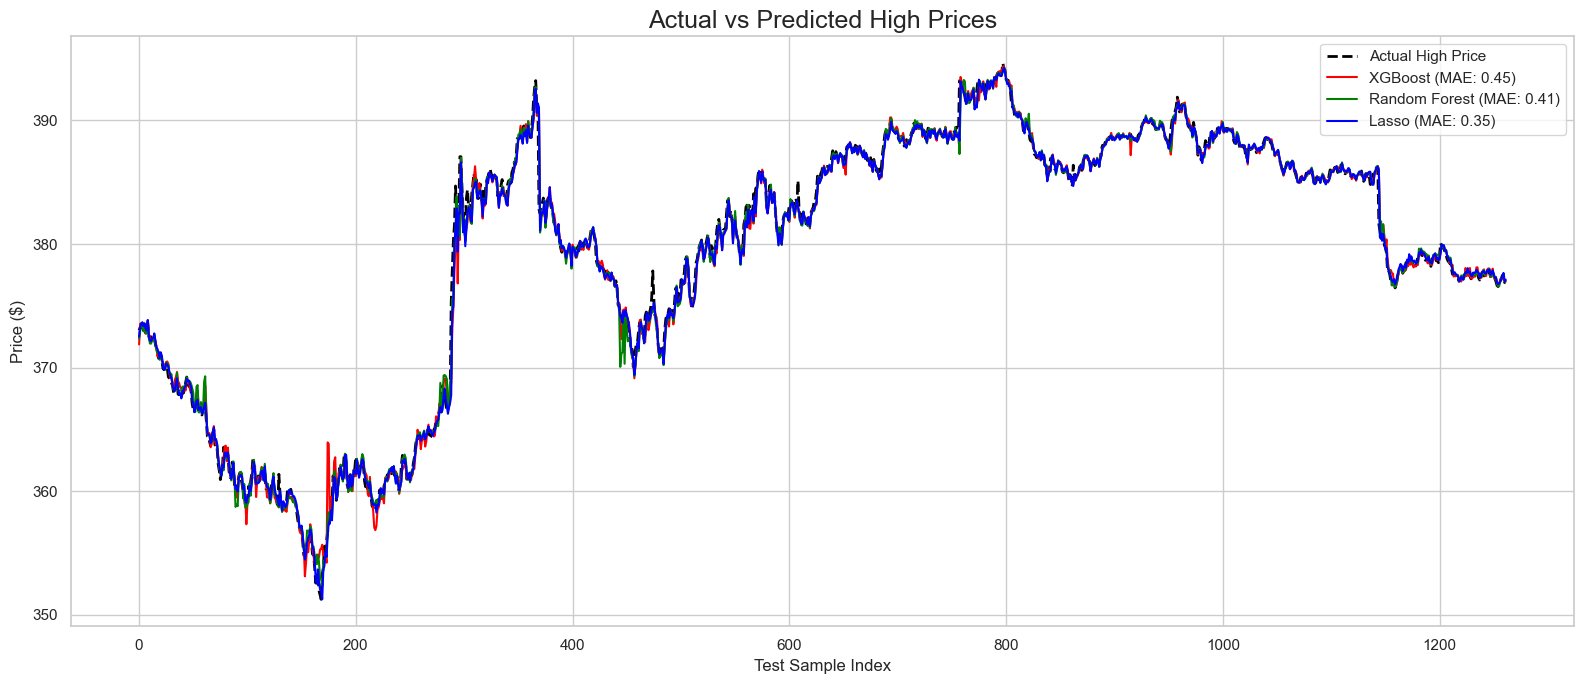

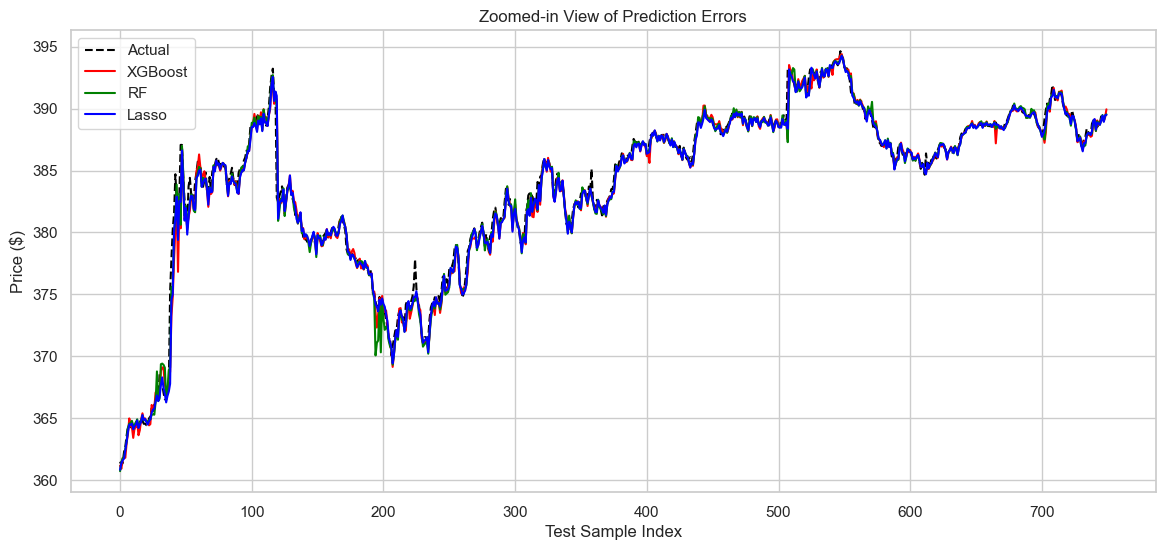

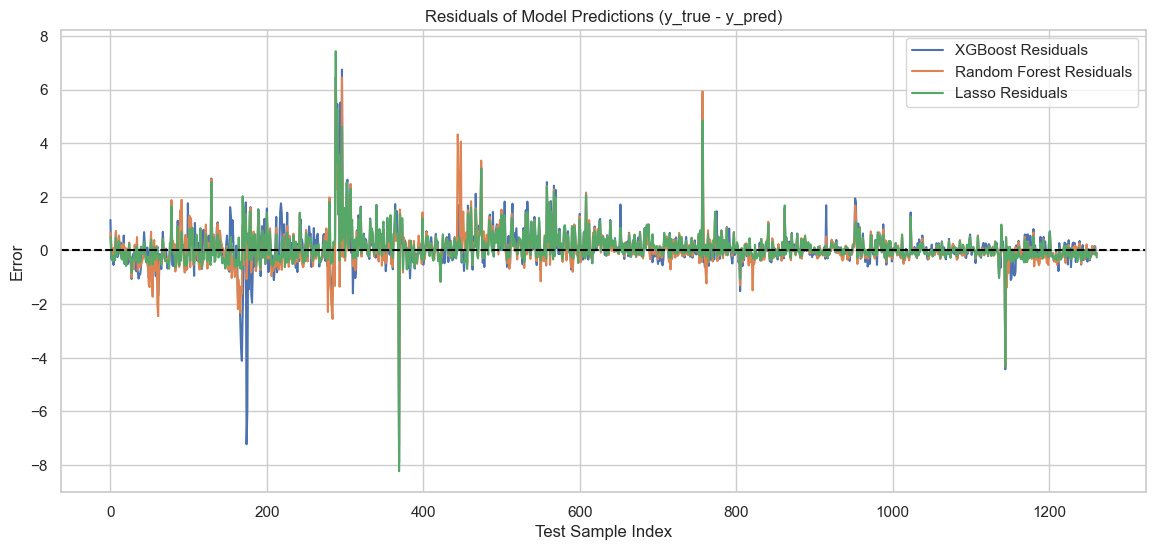

In [44]:
performance_results = train_and_evaluate_models(df, target_col="High", window_size=10, alpha=0.1, n_estimators=100)

C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+03, tolerance: 4.361e+01
  model = cd_fast.enet_coordinate_descent(


              Model       MAE       MSE      RMSE  R2 Score
0           XGBoost  0.458755  0.649373  0.805837  0.993985
1     Random Forest  0.412386  0.514894  0.717561  0.995230
2  Lasso Regression  0.349545  0.413859  0.643319  0.996166


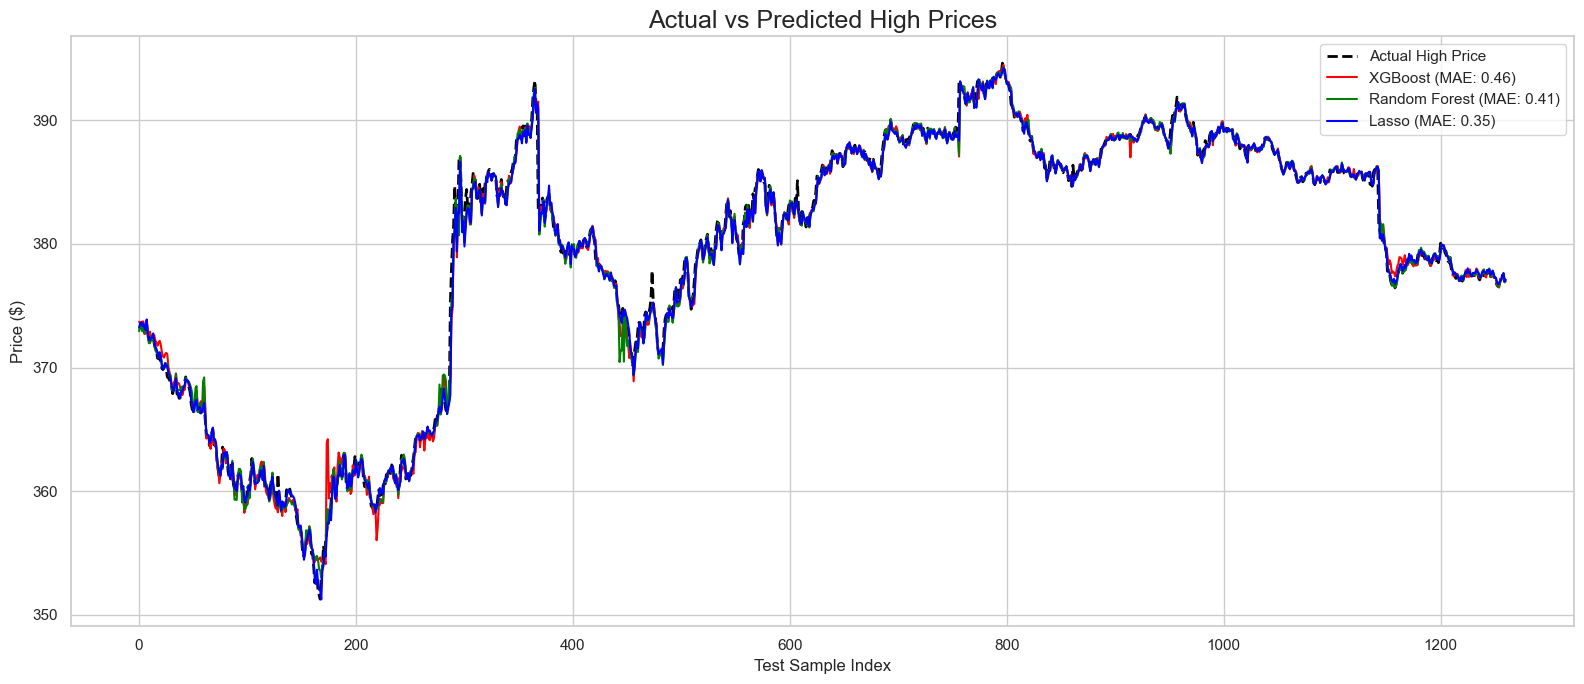

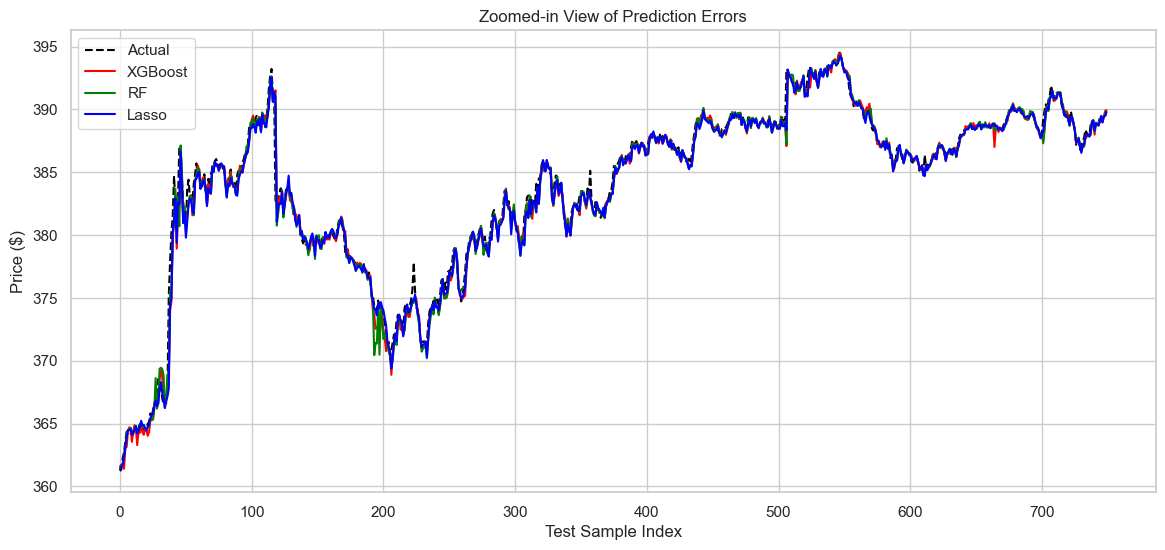

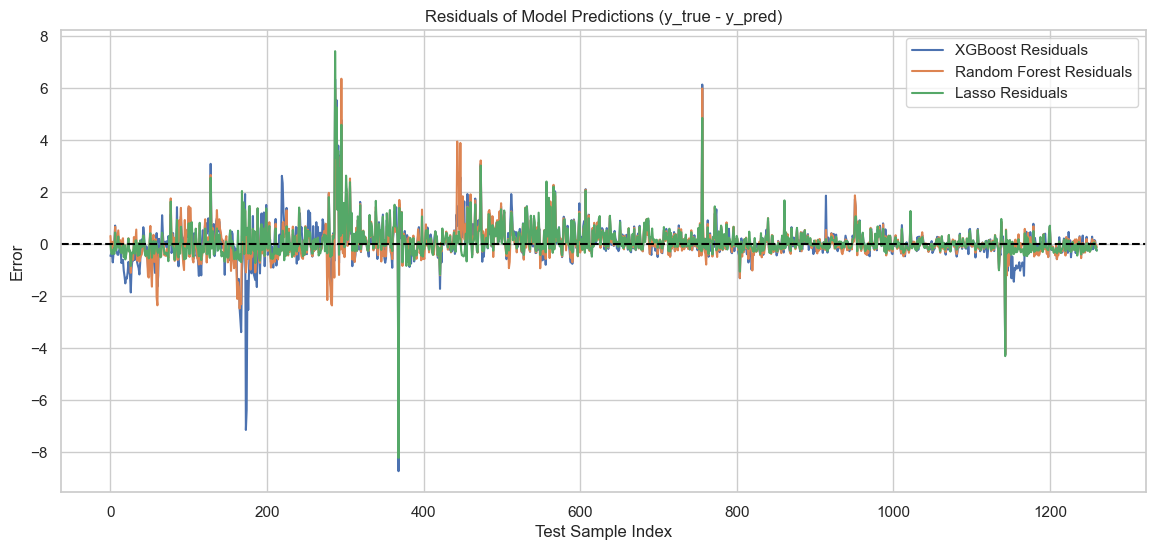

In [46]:
performance_results = train_and_evaluate_models(df, target_col="High", window_size=15, alpha=0.1, n_estimators=200)

C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+03, tolerance: 4.357e+01
  model = cd_fast.enet_coordinate_descent(


              Model       MAE       MSE      RMSE  R2 Score
0           XGBoost  0.535614  0.863886  0.929455  0.992002
1     Random Forest  0.411710  0.518664  0.720183  0.995198
2  Lasso Regression  0.348038  0.409359  0.639811  0.996210


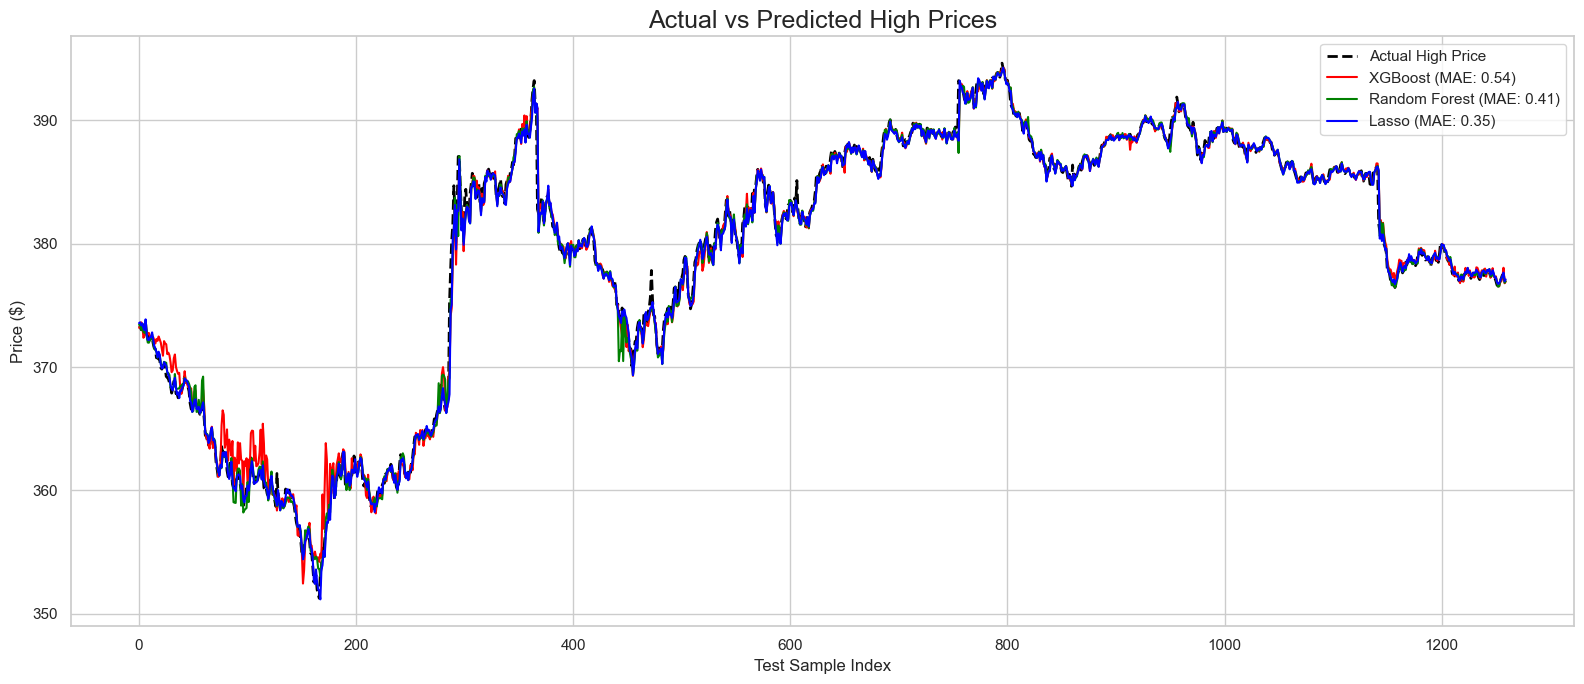

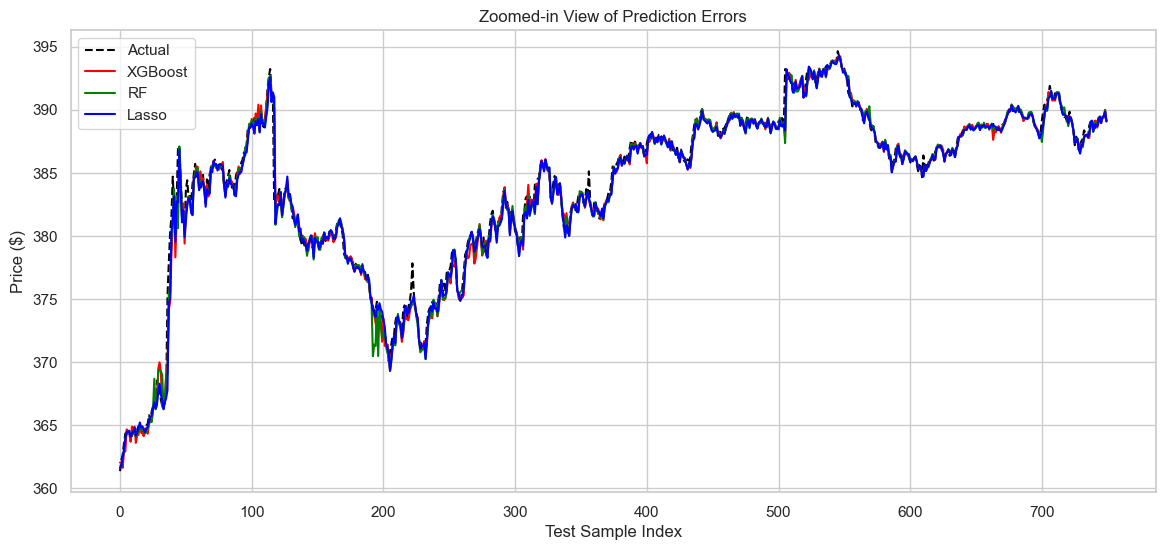

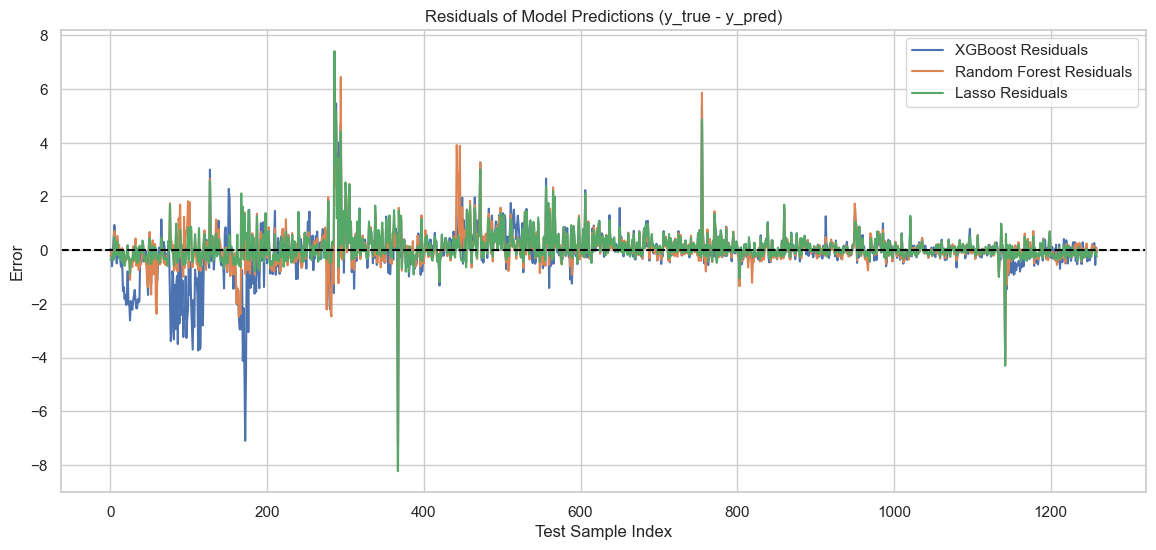

In [47]:
performance_results = train_and_evaluate_models(df, target_col="High", window_size=20, alpha=0.1, n_estimators=300)

In [48]:
def train_and_evaluate_models(ticker, target_col="Open", window_size=5, alpha=0.1, n_estimators=100, period="60d", interval="2m"):
    """
    Fetches stock data, computes technical indicators, applies sliding window transformation,
    and trains XGBoost, Random Forest, and Lasso Regression models.

    Parameters:
    - ticker: Stock ticker symbol.
    - target_col: Column to predict (default: "Open").
    - window_size: Number of past time steps to use as features (default: 5).
    - alpha: Regularization strength for Lasso Regression (default: 0.1).
    - n_estimators: Number of trees for XGBoost and Random Forest (default: 100).
    - period: Historical period for stock data (default: "60d").
    - interval: Interval between data points (default: "2m").

    Returns:
    - performance_df: DataFrame containing evaluation metrics for all models.
    """
    import pandas as pd
    import numpy as np
    import xgboost as xgb
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import Lasso
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    import yfinance as yf

    sns.set(style='whitegrid')

    # Fetch stock data
    df = yf.download(ticker, period=period, interval=interval)
    df.columns = [i[0] for i in df.columns]

    # RSI calculation
    def compute_rsi(data, window=14):
        delta = data.diff()
        gain = delta.clip(lower=0).rolling(window=window).mean()
        loss = -delta.clip(upper=0).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    # MACD calculation
    def compute_macd(data, short_window=12, long_window=26, signal_window=9):
        short_ema = data.ewm(span=short_window, adjust=False).mean()
        long_ema = data.ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    # Technical indicators
    df["SMA_10"] = df["Open"].rolling(window=10).mean()
    df["EMA_10"] = df["Open"].ewm(span=10, adjust=False).mean()
    df["RSI_14"] = compute_rsi(df["Open"])
    df["MACD"], df["Signal_Line"] = compute_macd(df["Open"])
    df["BB_Mid"] = df["Open"].rolling(window=20).mean()
    df["BB_Std"] = df["Open"].rolling(window=20).std()
    df["BB_Upper"] = df["BB_Mid"] + (df["BB_Std"] * 2)
    df["BB_Lower"] = df["BB_Mid"] - (df["BB_Std"] * 2)
    df["VWAP"] = (df["Open"] * df["Volume"]).cumsum() / df["Volume"].cumsum()
    high, low = df["High"].max(), df["Low"].min()
    df["Fib_23.6"] = low + 0.236 * (high - low)
    df["Fib_38.2"] = low + 0.382 * (high - low)
    df["Fib_61.8"] = low + 0.618 * (high - low)
    df.drop(columns=["BB_Std"], inplace=True)

    # Prevent leakage
    for col in ["SMA_10", "EMA_10", "RSI_14", "MACD", "Signal_Line", "VWAP", "BB_Mid", "BB_Upper", "BB_Lower"]:
        df[col] = df[col].shift(1)

    df.dropna(inplace=True)

    # Sliding window
    def create_sliding_window_data(df, target_col, window_size):
        feature_cols = [col for col in df.columns if col != target_col]
        X, y = [], []
        for i in range(len(df) - window_size):
            X.append(df.iloc[i : i + window_size][feature_cols].values)
            y.append(df.iloc[i + window_size][target_col])
        return np.array(X), np.array(y)

    X, y = create_sliding_window_data(df, target_col, window_size)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Models
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=n_estimators, tree_method="hist", random_state=42)
    xgb_model.fit(X_train_flat, y_train)
    xgb_preds = xgb_model.predict(X_test_flat)

    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train_flat, y_train)
    rf_preds = rf_model.predict(X_test_flat)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_flat, y_train)
    lasso_preds = lasso_model.predict(X_test_flat)

    # Metrics
    performance_df = pd.DataFrame({
        "Model": ["XGBoost", "Random Forest", "Lasso Regression"],
        "MAE": [mean_absolute_error(y_test, xgb_preds), 
                mean_absolute_error(y_test, rf_preds), 
                mean_absolute_error(y_test, lasso_preds)],
        "MSE": [mean_squared_error(y_test, xgb_preds), 
                mean_squared_error(y_test, rf_preds), 
                mean_squared_error(y_test, lasso_preds)],
        "RMSE": [np.sqrt(mean_squared_error(y_test, xgb_preds)), 
                 np.sqrt(mean_squared_error(y_test, rf_preds)), 
                 np.sqrt(mean_squared_error(y_test, lasso_preds))],
        "R2 Score": [r2_score(y_test, xgb_preds), 
                     r2_score(y_test, rf_preds), 
                     r2_score(y_test, lasso_preds)]
    })

    print(performance_df)

    # Prediction Plot
    plt.figure(figsize=(16, 7))
    plt.plot(y_test, label="Actual Price", color="black", linestyle="--", linewidth=2)
    plt.plot(xgb_preds, label=f"XGBoost (MAE: {performance_df['MAE'][0]:.2f})", color="red")
    plt.plot(rf_preds, label=f"RF (MAE: {performance_df['MAE'][1]:.2f})", color="green")
    plt.plot(lasso_preds, label=f"Lasso (MAE: {performance_df['MAE'][2]:.2f})", color="blue")
    plt.title(f"{ticker} Actual vs Predicted ({target_col})", fontsize=16)
    plt.xlabel("Test Sample Index")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #  Zoomed-In Region
    zoom_range = slice(250, 1000)
    plt.figure(figsize=(14, 6))
    plt.plot(y_test[zoom_range], label="Actual", color="black", linestyle="--")
    plt.plot(xgb_preds[zoom_range], label="XGBoost", color="red")
    plt.plot(rf_preds[zoom_range], label="RF", color="green")
    plt.plot(lasso_preds[zoom_range], label="Lasso", color="blue")
    plt.title("Zoomed-in View of Predictions")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Residuals
    errors = {
        "XGBoost": y_test - xgb_preds,
        "Random Forest": y_test - rf_preds,
        "Lasso": y_test - lasso_preds
    }

    plt.figure(figsize=(14, 6))
    for model, err in errors.items():
        plt.plot(err, label=f"{model} Residuals")
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Residuals of Model Predictions (y_true - y_pred)")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Error")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return performance_df


[*********************100%***********************]  1 of 1 completed
C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.126e+02, tolerance: 4.544e+01
  model = cd_fast.enet_coordinate_descent(


              Model       MAE       MSE      RMSE  R2 Score
0           XGBoost  0.429148  0.530502  0.728356  0.995075
1     Random Forest  0.560065  1.753870  1.324338  0.983719
2  Lasso Regression  0.084972  0.105295  0.324492  0.999023


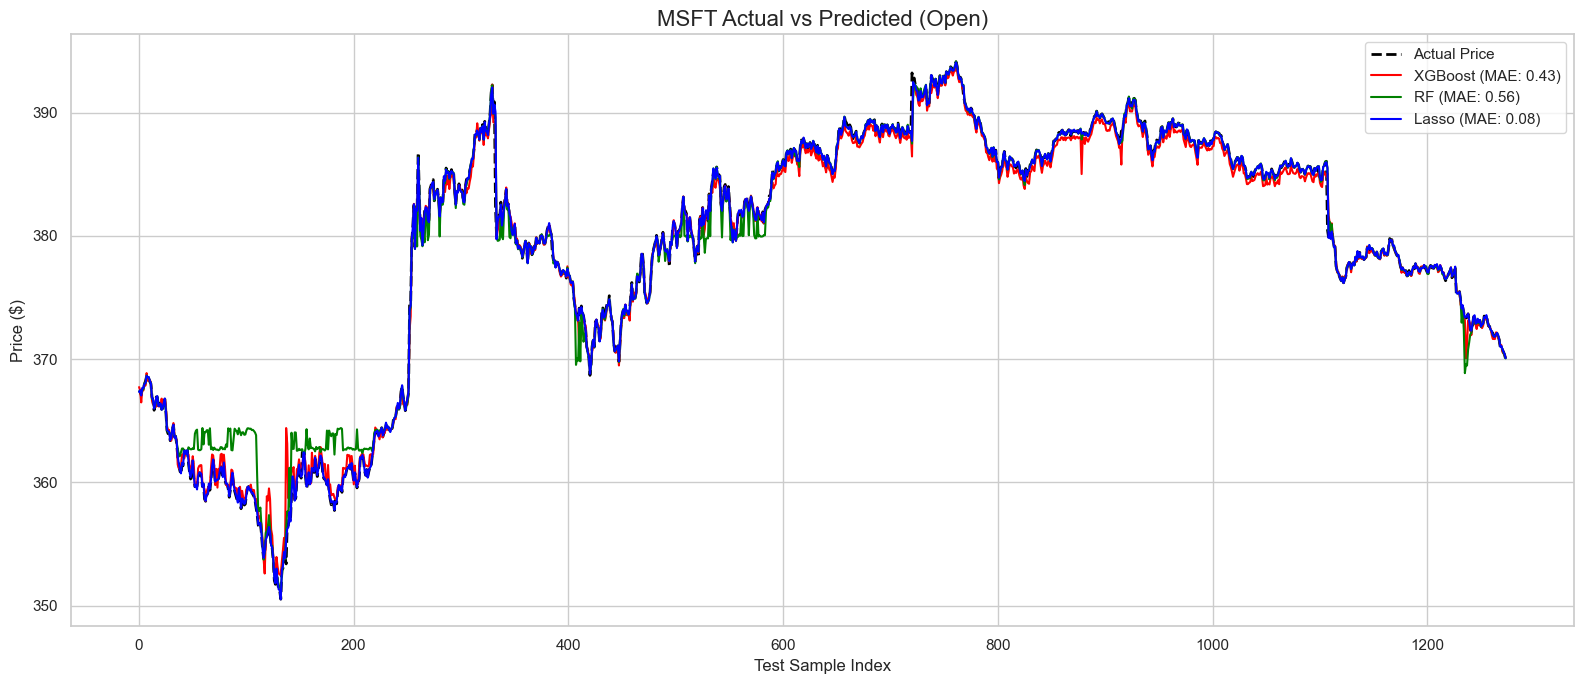

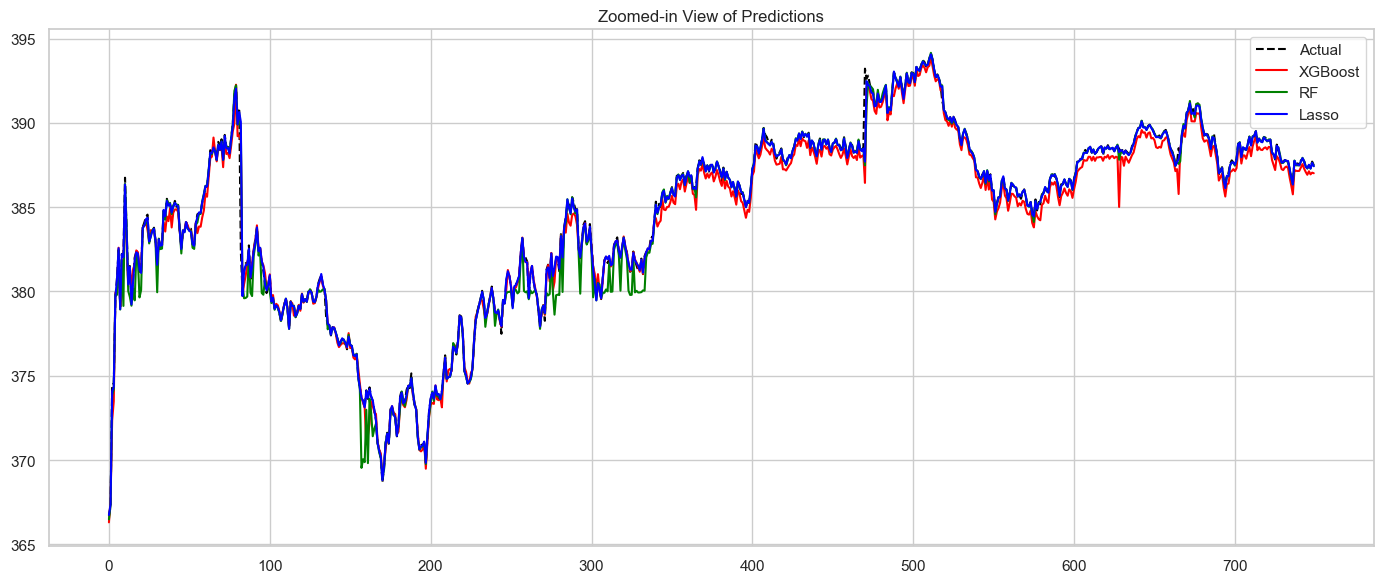

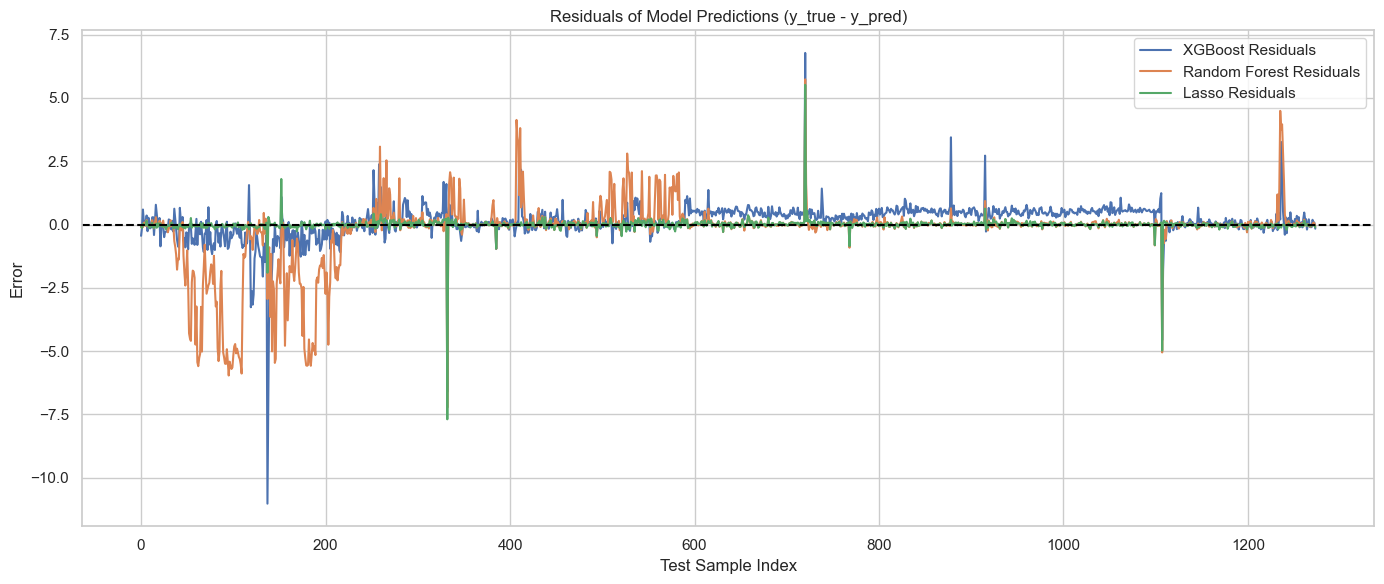

In [49]:
performance_results = train_and_evaluate_models(ticker="MSFT", window_size=5, alpha=0.1, n_estimators=100)

1. XGBoost	❌ No need for scaling (trees handle raw data well)
2. Random Forest	❌ No need for scaling (trees are robust)
3. Lasso Regression	✅ StandardScaler (Required)
4. Neural Networks (Future Use)	✅ MinMaxScaler (Better for NN)


In [68]:
def train_and_evaluate_extended_models(ticker, target_col="Open", window_size=5, alpha=0.1, n_estimators=100, period="60d", interval="2m"):
    import pandas as pd
    import numpy as np
    import xgboost as xgb
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import Lasso, Ridge, ElasticNet, BayesianRidge
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    import yfinance as yf
    from math import pi
    import joblib

    sns.set(style='whitegrid')

    # Fetch stock data
    df = yf.download(ticker, period=period, interval=interval)
    df.columns = [i[0] for i in df.columns]

    # Technical Indicators
    def compute_rsi(data, window=14):
        delta = data.diff()
        gain = delta.clip(lower=0).rolling(window=window).mean()
        loss = -delta.clip(upper=0).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    def compute_macd(data, short_window=12, long_window=26, signal_window=9):
        short_ema = data.ewm(span=short_window, adjust=False).mean()
        long_ema = data.ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    df["SMA_10"] = df[target_col].rolling(window=10).mean()
    df["EMA_10"] = df[target_col].ewm(span=10, adjust=False).mean()
    df["RSI_14"] = compute_rsi(df[target_col])
    df["MACD"], df["Signal_Line"] = compute_macd(df[target_col])
    df.dropna(inplace=True)

    def create_sliding_window_data(df, target_col, window_size):
        feature_cols = [col for col in df.columns if col != target_col]
        X, y = [], []
        for i in range(len(df) - window_size):
            X.append(df.iloc[i : i + window_size][feature_cols].values)
            y.append(df.iloc[i + window_size][target_col])
        return np.array(X), np.array(y)

    X, y = create_sliding_window_data(df, target_col, window_size)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    X_train_flat = np.nan_to_num(X_train.reshape(X_train.shape[0], -1).astype(np.float32))
    X_test_flat = np.nan_to_num(X_test.reshape(X_test.shape[0], -1).astype(np.float32))

    models = {
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=n_estimators, tree_method="hist", random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
        "Lasso Regression": Lasso(alpha=alpha),
        "Ridge Regression": Ridge(alpha=alpha),
        "ElasticNet Regression": ElasticNet(alpha=alpha, l1_ratio=0.5),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=n_estimators, random_state=42),
        "Support Vector Regression": SVR(kernel='rbf', C=100, epsilon=0.1),
        "Bayesian Ridge": BayesianRidge(),
        "KNN Regression": KNeighborsRegressor(n_neighbors=3)
    }

    performance_metrics = {"Model": [], "MAE": [], "MSE": [], "RMSE": [], "R2 Score": []}
    training_losses = {}
    predictions = {}

    for name, model in models.items():
        try:
            model.fit(X_train_flat, y_train)
            preds = model.predict(X_test_flat)
            predictions[name] = preds
            training_losses[name] = mean_squared_error(y_train, model.predict(X_train_flat))
            performance_metrics["Model"].append(name)
            performance_metrics["MAE"].append(mean_absolute_error(y_test, preds))
            performance_metrics["MSE"].append(mean_squared_error(y_test, preds))
            performance_metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, preds)))
            performance_metrics["R2 Score"].append(r2_score(y_test, preds))
            if name in ["Lasso Regression", "Ridge Regression", "ElasticNet Regression"]:
                joblib.dump(model, f"{name.replace(' ', '_').lower()}.pkl")
        except Exception as e:
            print(f"Error training {name}: {e}")

    performance_df = pd.DataFrame(performance_metrics)
    print(performance_df)

    # --- Visualizations ---
    # Training Loss
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(training_losses.keys()), y=list(training_losses.values()), palette="crest")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Training Loss (MSE)")
    plt.title("Training Loss per Model")
    plt.tight_layout()
    plt.show()

    # Actual vs Predictions
    for name, preds in predictions.items():
        plt.figure(figsize=(16, 8))
        plt.plot(y_test, label="Actual Price", color="black", linestyle="--", linewidth=2)
        plt.plot(preds, label=f"{name} (MAE: {mean_absolute_error(y_test, preds):.2f})", alpha=0.75)
        plt.title(f"{name} Predictions on Test Set ({ticker})")
        plt.xlabel("Test Sample Index")
        plt.ylabel("Price ($)")
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

    # Zoomed-in Plot
    zoom_range = slice(250, 1000)
    plt.figure(figsize=(14, 6))
    plt.plot(y_test[zoom_range], label="Actual", color="black", linestyle="--")
    for name, preds in predictions.items():
        plt.plot(preds[zoom_range], label=name, alpha=0.75)
    plt.title("Zoomed-in Model Predictions")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Price ($)")
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()

    # Residuals Plot
    plt.figure(figsize=(14, 6))
    for name, preds in predictions.items():
        residuals = y_test - preds
        plt.plot(residuals, label=f"{name} Residuals", alpha=0.8)
    plt.axhline(0, color="black", linestyle="--")
    plt.title("Residual Errors (y_true - y_pred)")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Residual Error")
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()

    # Radar Chart
    normalized_df = performance_df.copy()
    normalized_df.set_index("Model", inplace=True)

    for col in ["MAE", "MSE", "RMSE"]:
        normalized_df[col] = 1 / (normalized_df[col] + 1e-5)
    normalized_df = (normalized_df - normalized_df.min()) / (normalized_df.max() - normalized_df.min())

    radar_df = normalized_df.T
    labels = radar_df.index.tolist()
    angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))] + [0]

    plt.figure(figsize=(10, 10))
    for model in radar_df.columns:
        values = radar_df[model].tolist() + [radar_df[model].tolist()[0]]
        plt.polar(angles, values, label=model, linewidth=2)

    plt.xticks(angles[:-1], labels, fontsize=12)
    plt.yticks([0.2, 0.5, 0.8], ["20%", "50%", "80%"], color="grey", size=10)
    plt.title("Model Comparison Radar Chart", fontsize=16)
    plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1.0))
    plt.tight_layout()
    plt.show()

    return performance_df

[*********************100%***********************]  1 of 1 completed
C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.924e+02, tolerance: 4.601e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.2673e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.724e+02, tolerance: 4.601e+01
  model = cd_fast.enet_coordinate_descen

                       Model        MAE          MSE       RMSE   R2 Score
0                    XGBoost   0.198483     0.322537   0.567924   0.996984
1              Random Forest   0.132007     0.173772   0.416860   0.998375
2           Lasso Regression   0.084836     0.104878   0.323849   0.999019
3           Ridge Regression   0.091538     0.106372   0.326147   0.999005
4      ElasticNet Regression   0.118933     0.116227   0.340920   0.998913
5          Gradient Boosting   0.177625     0.148233   0.385011   0.998614
6  Support Vector Regression   8.090338   119.586244  10.935550  -0.118082
7             Bayesian Ridge  26.753982  2533.743926  50.336308 -22.689461
8             KNN Regression   8.866658   142.850736  11.952018  -0.335595


C:\Users\shubb\AppData\Local\Temp\ipykernel_35124\1495460243.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_losses.keys()), y=list(training_losses.values()), palette="crest")


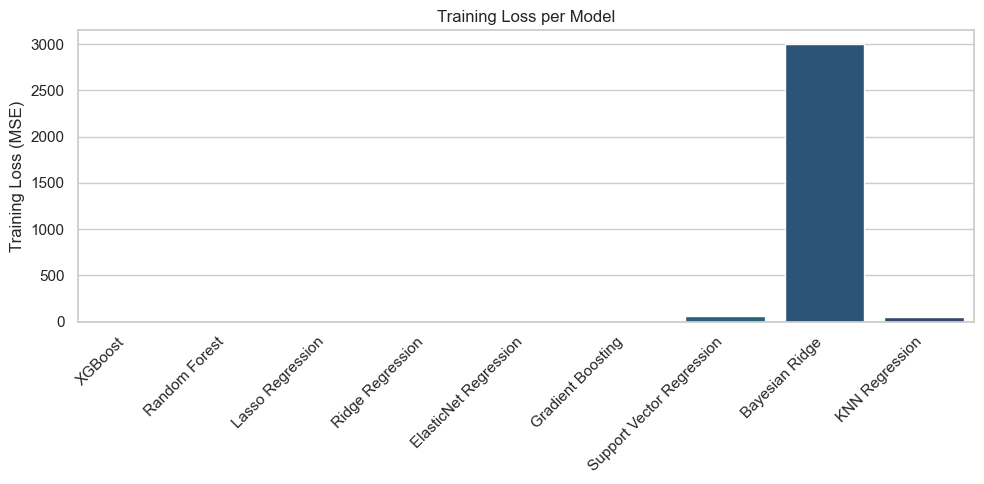

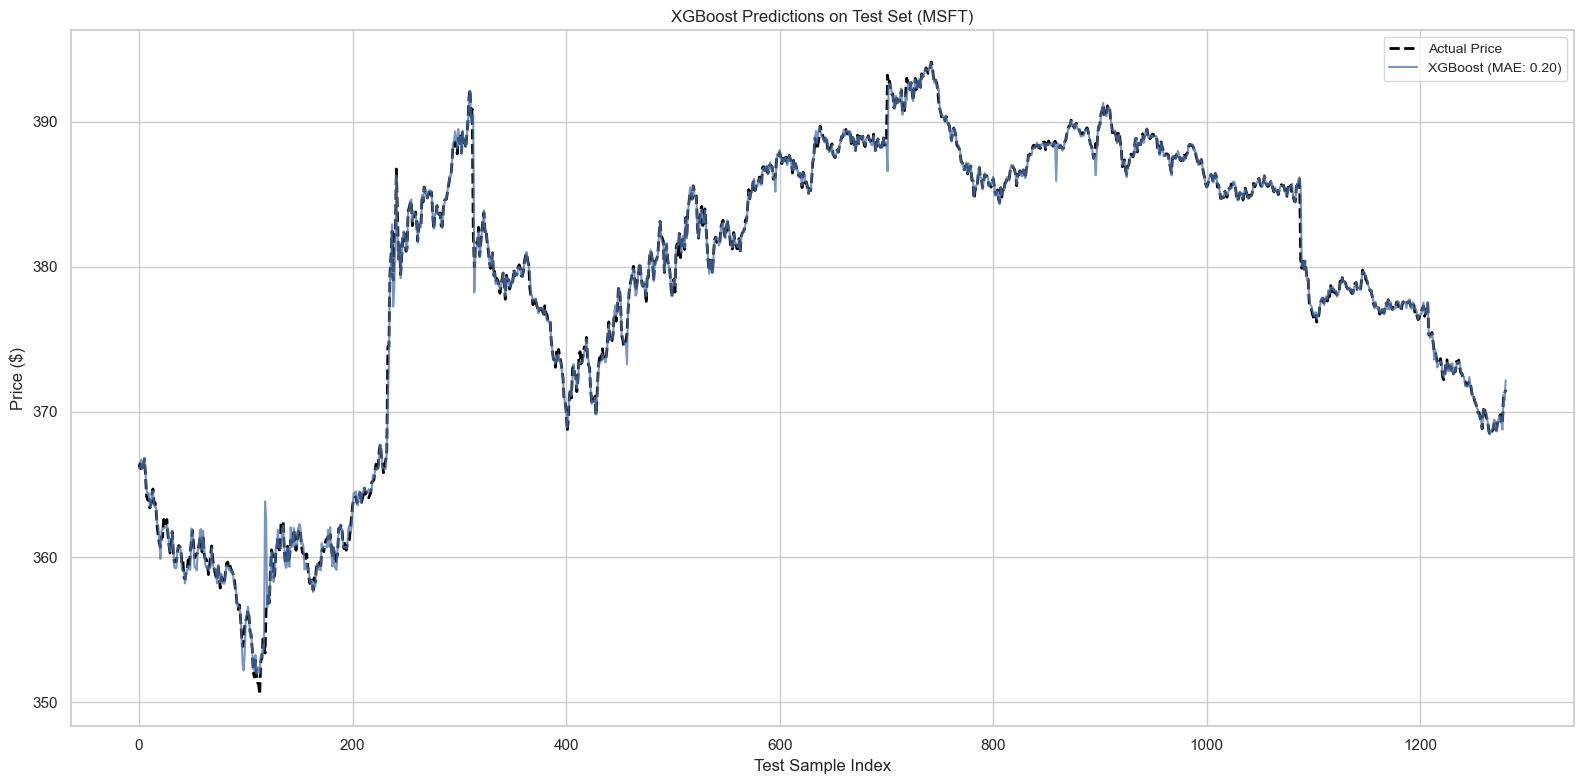

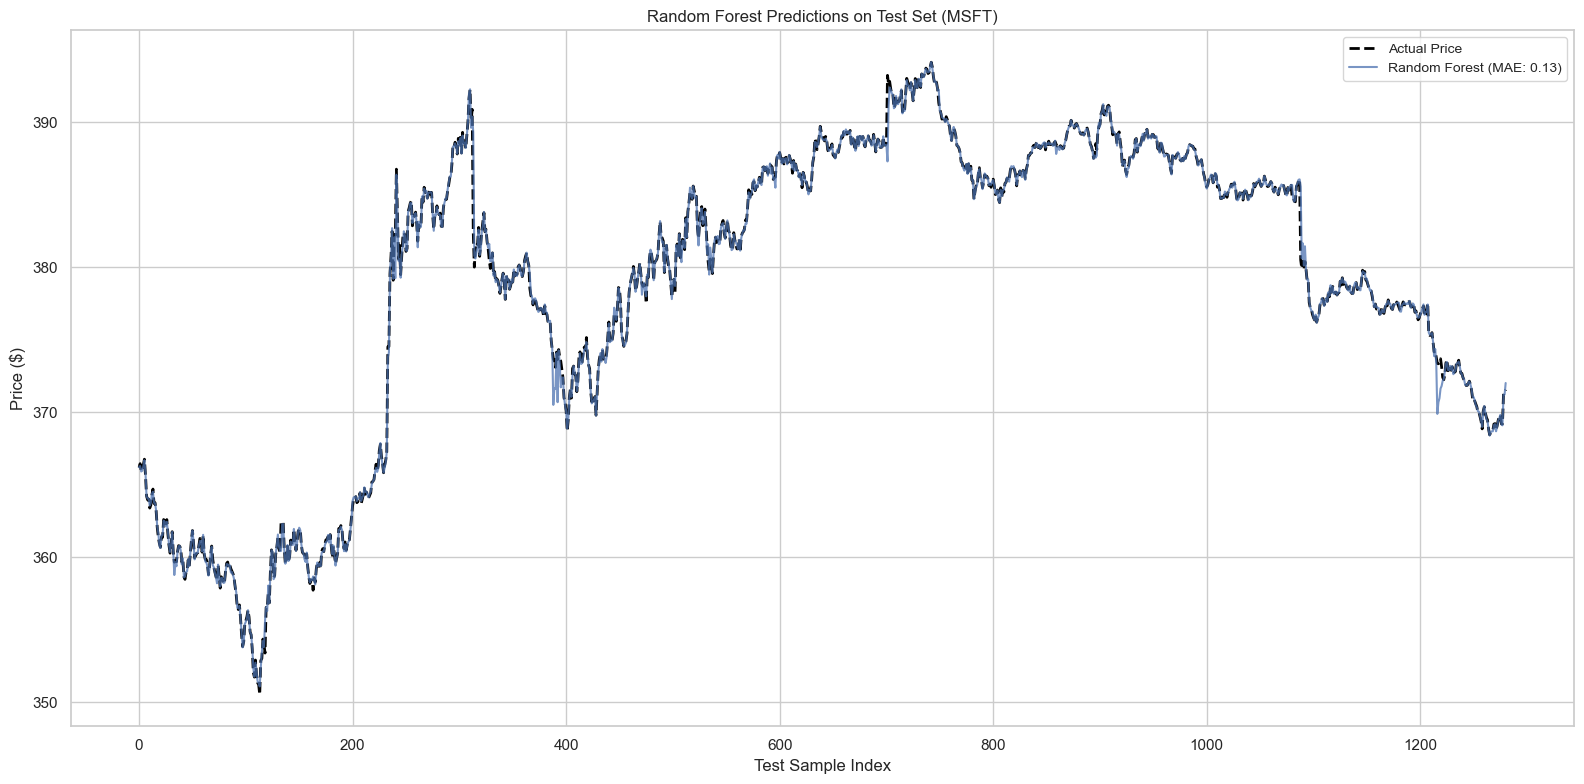

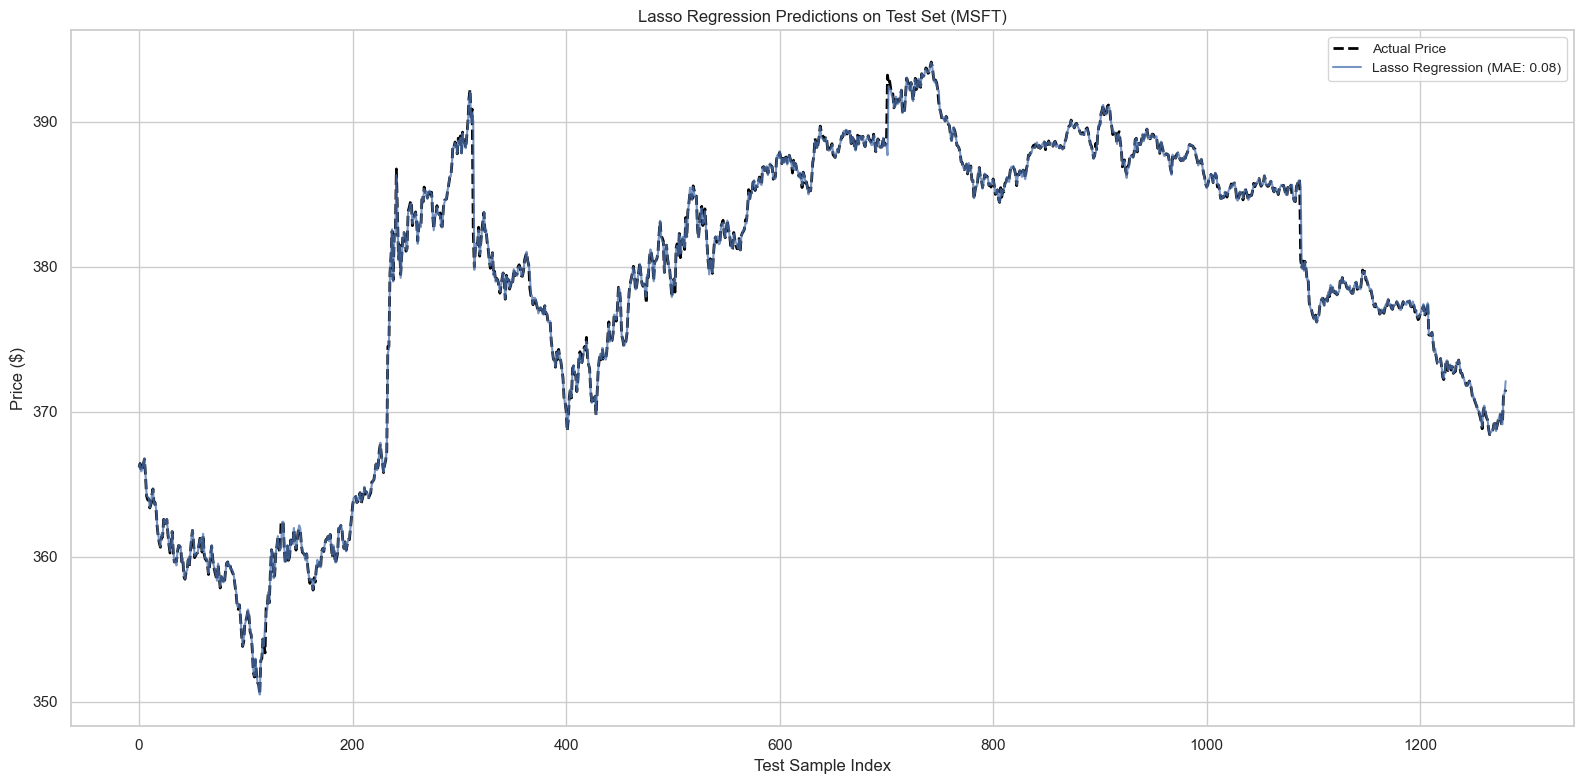

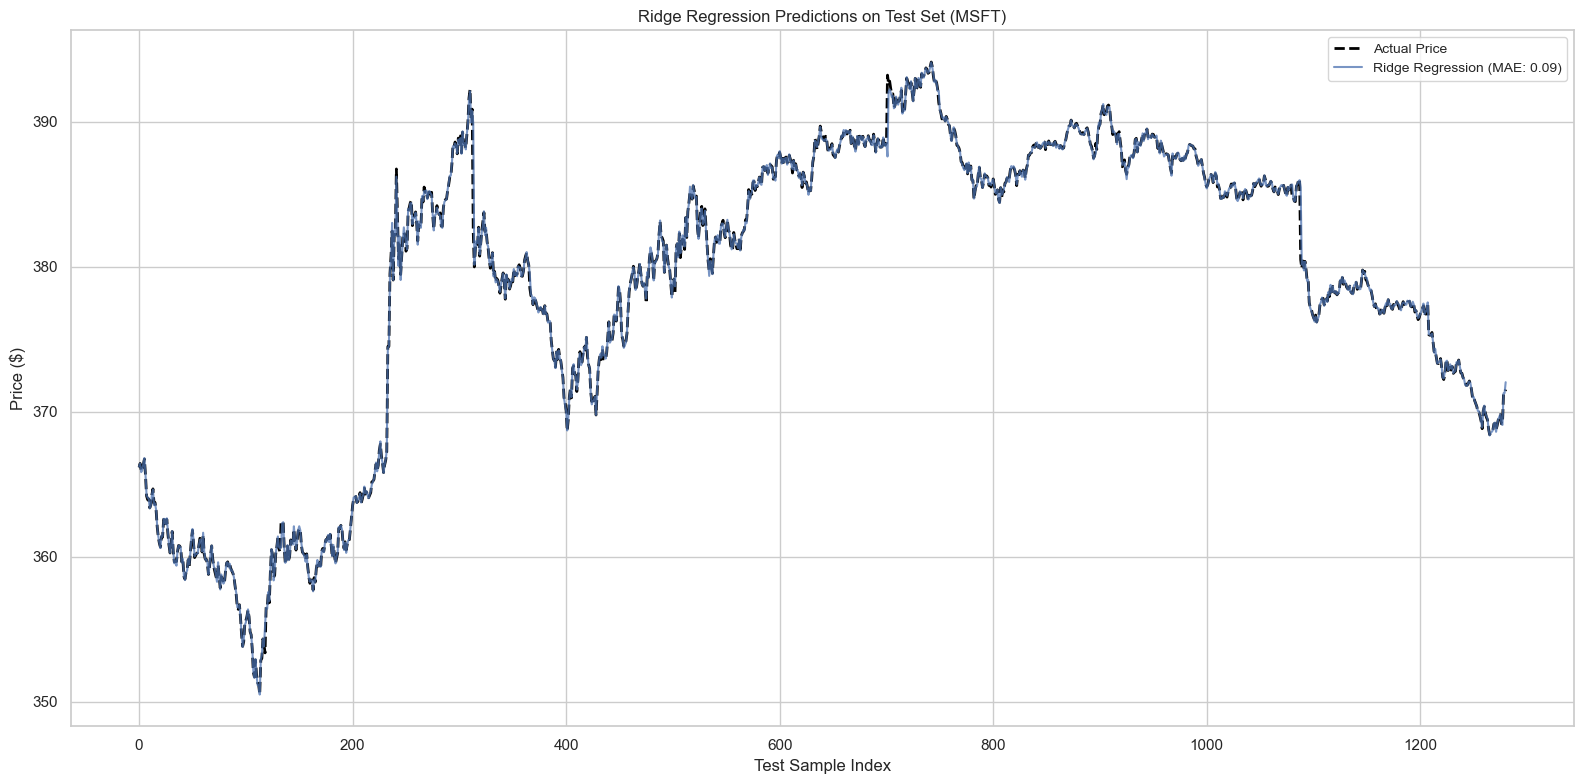

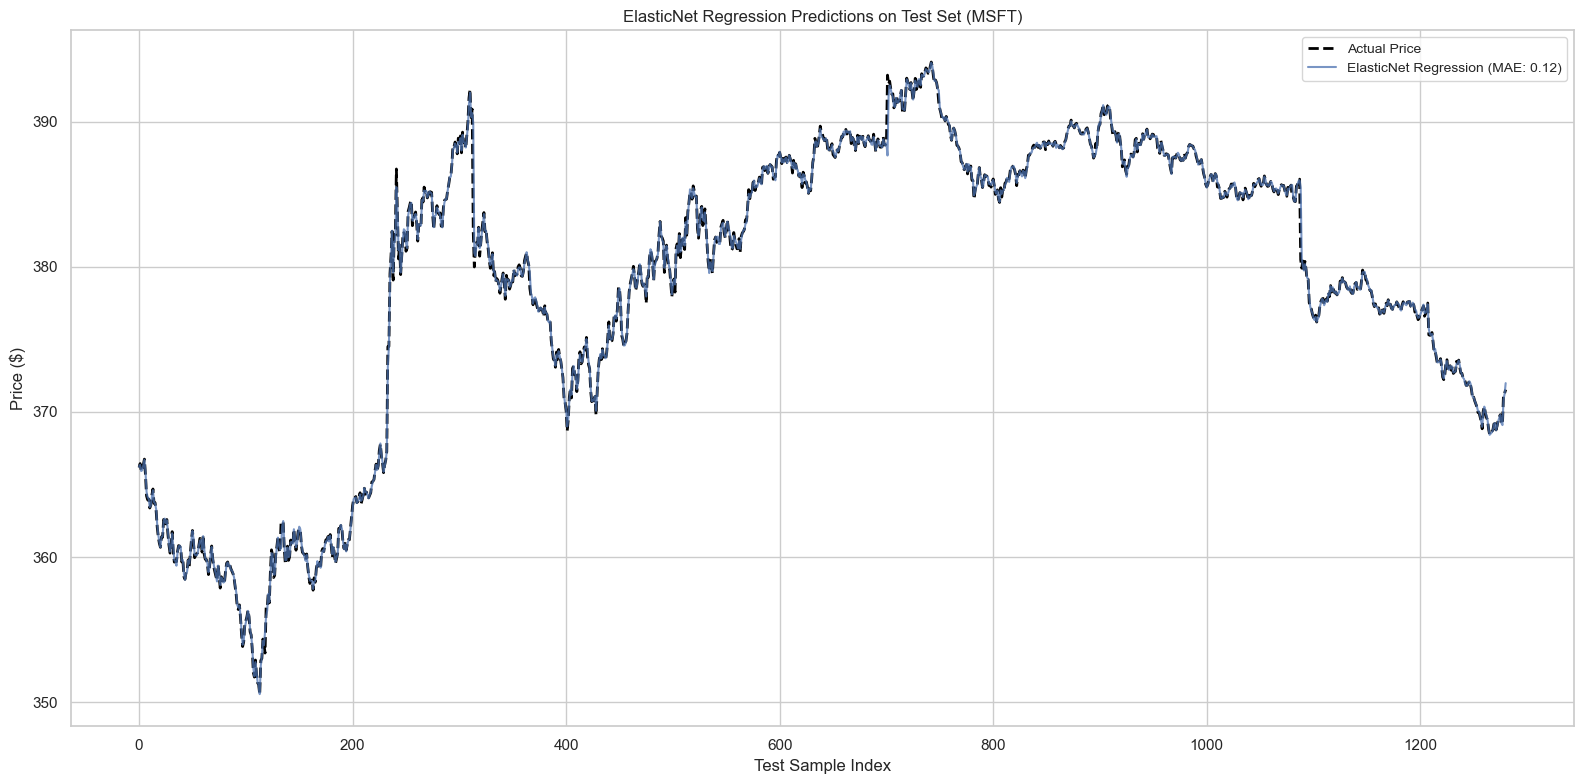

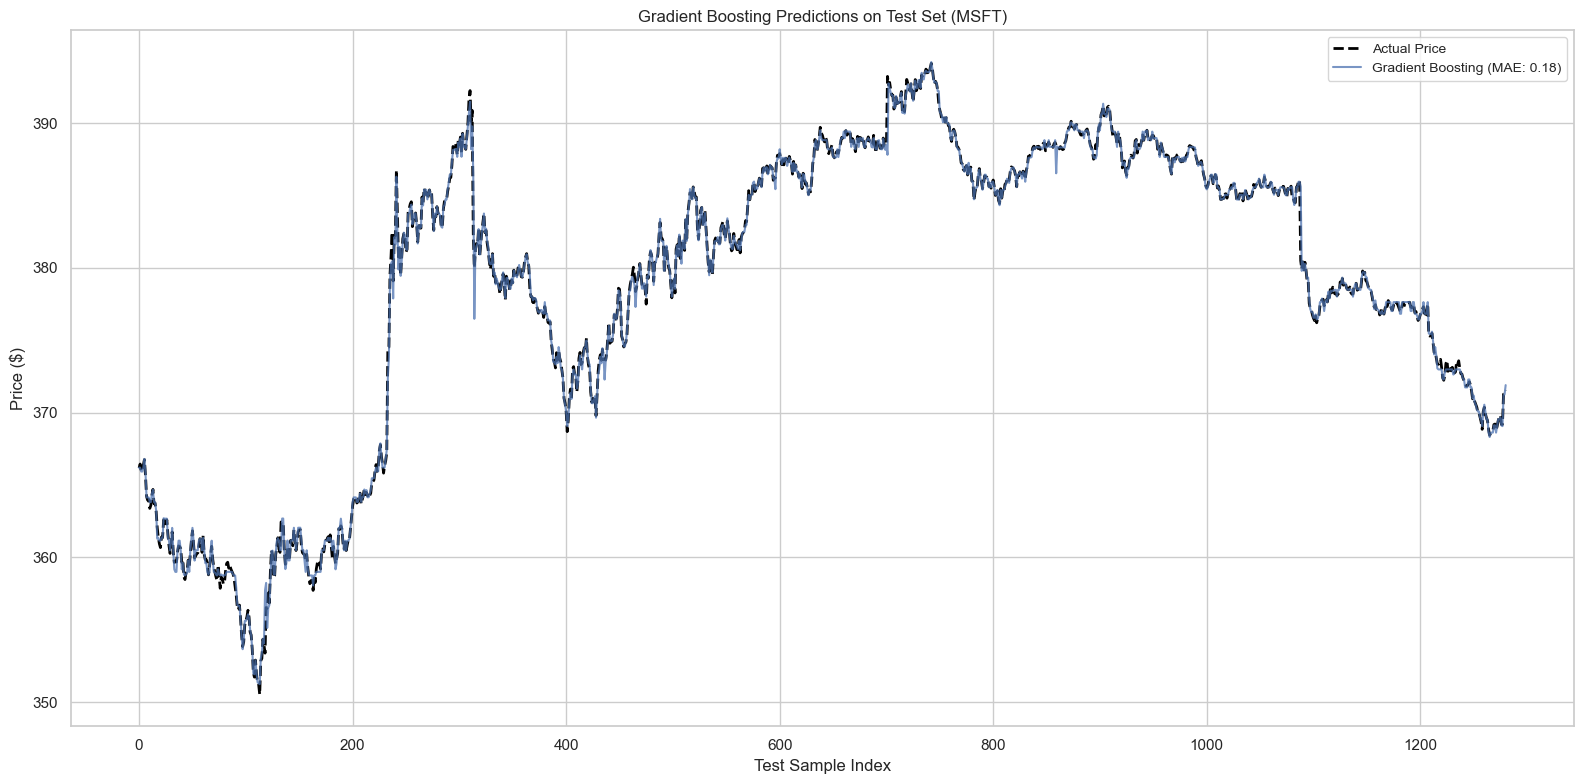

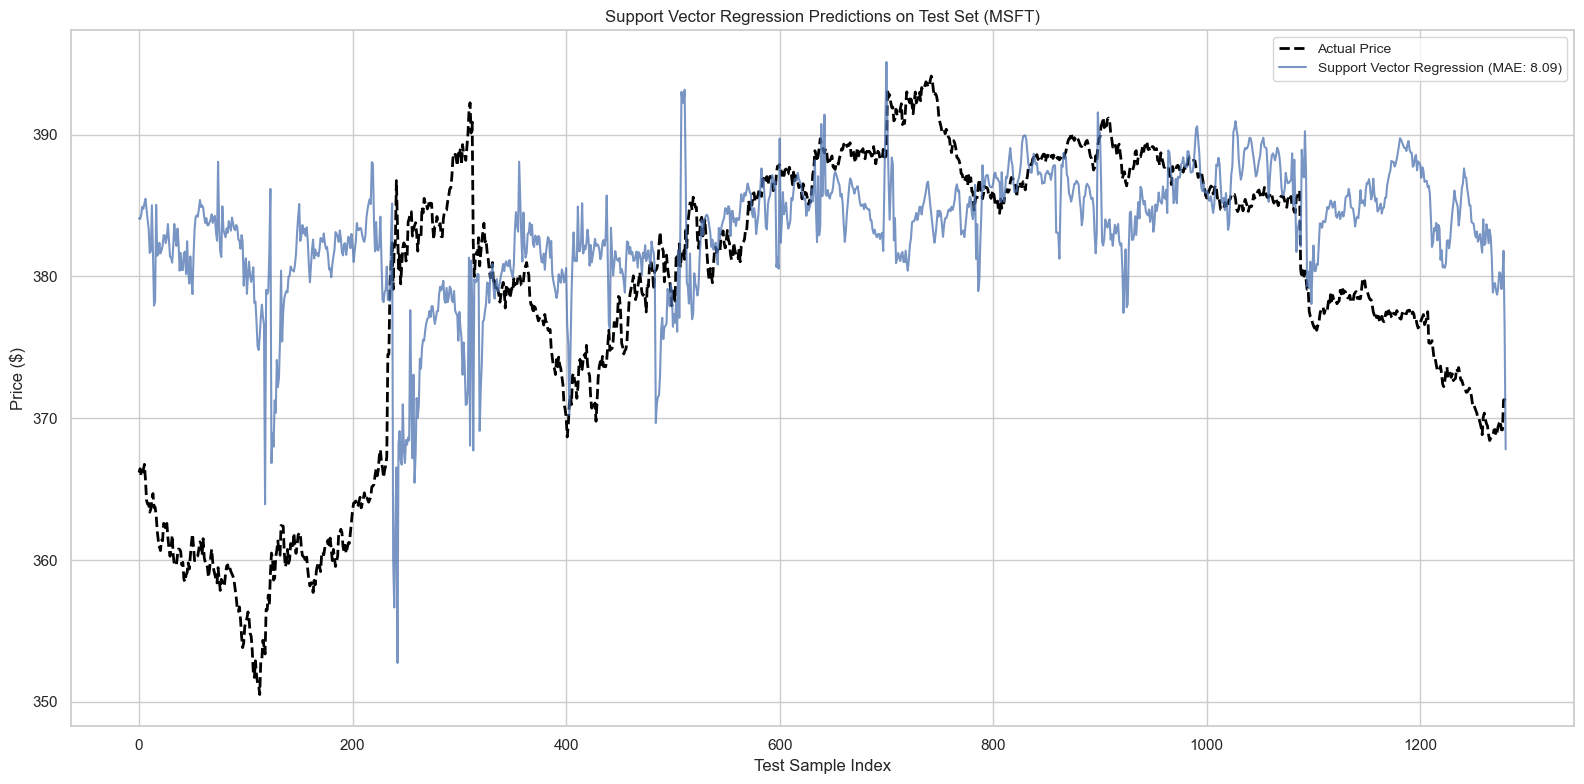

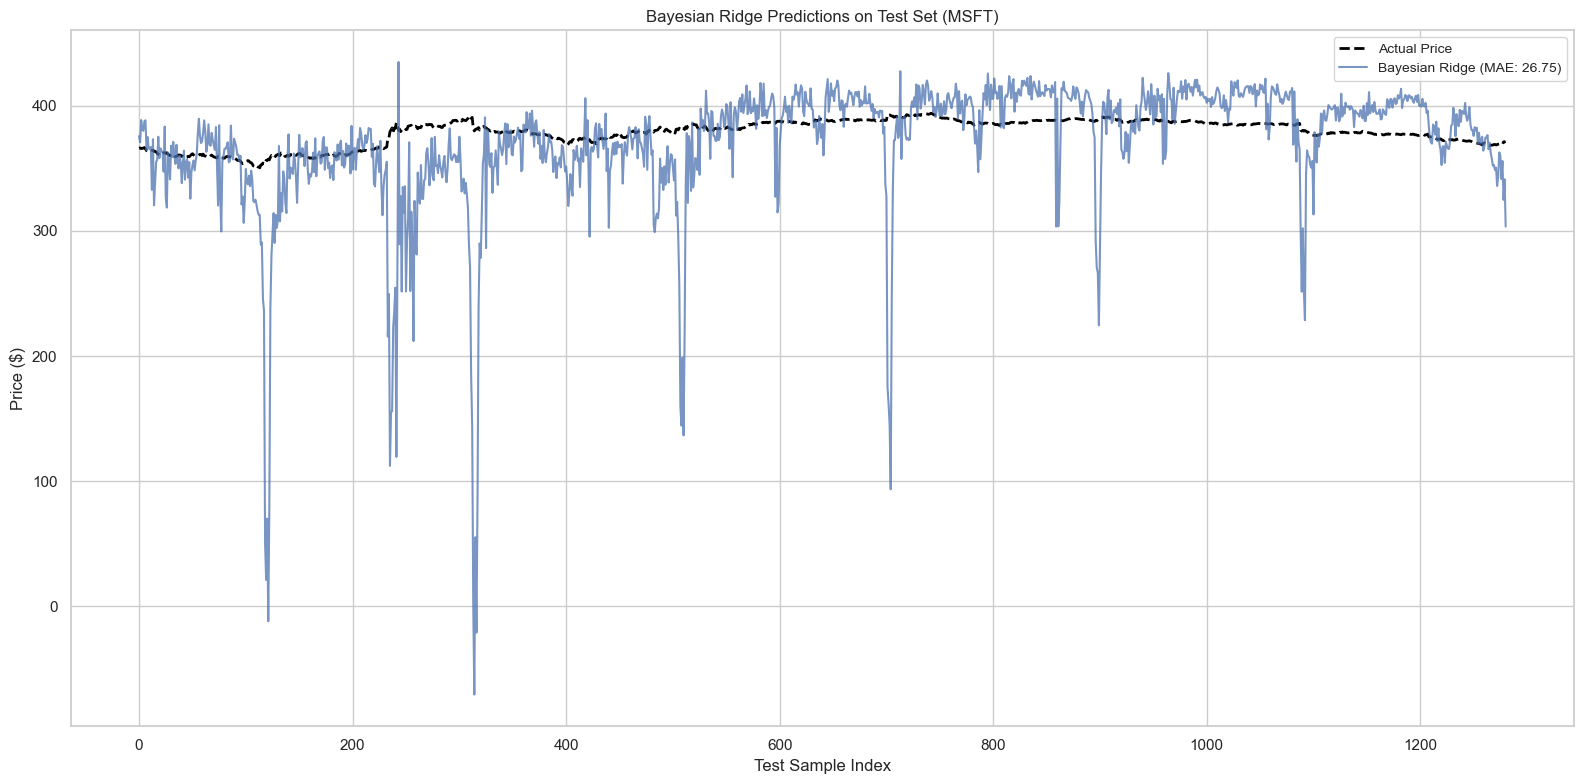

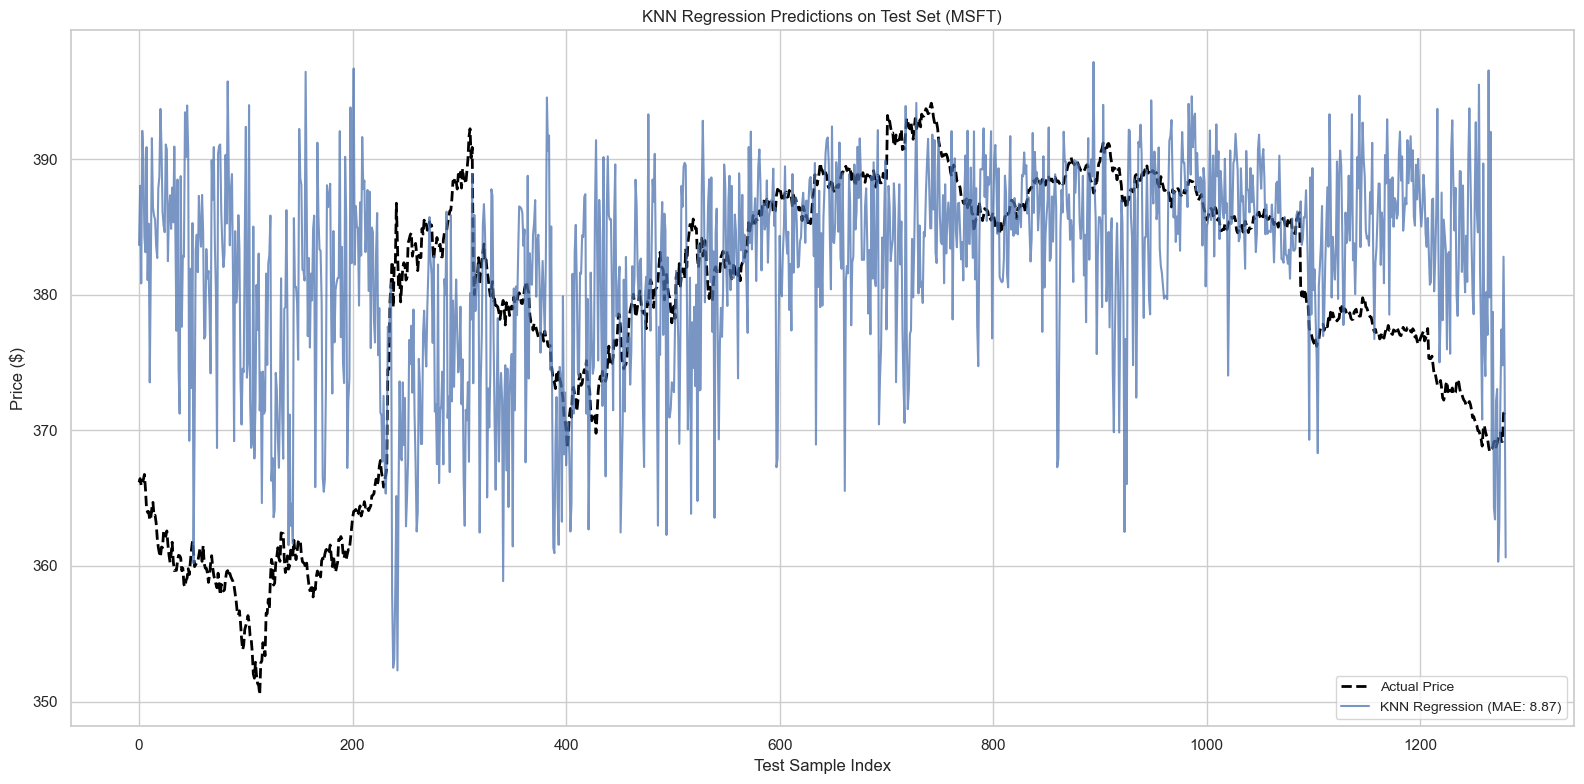

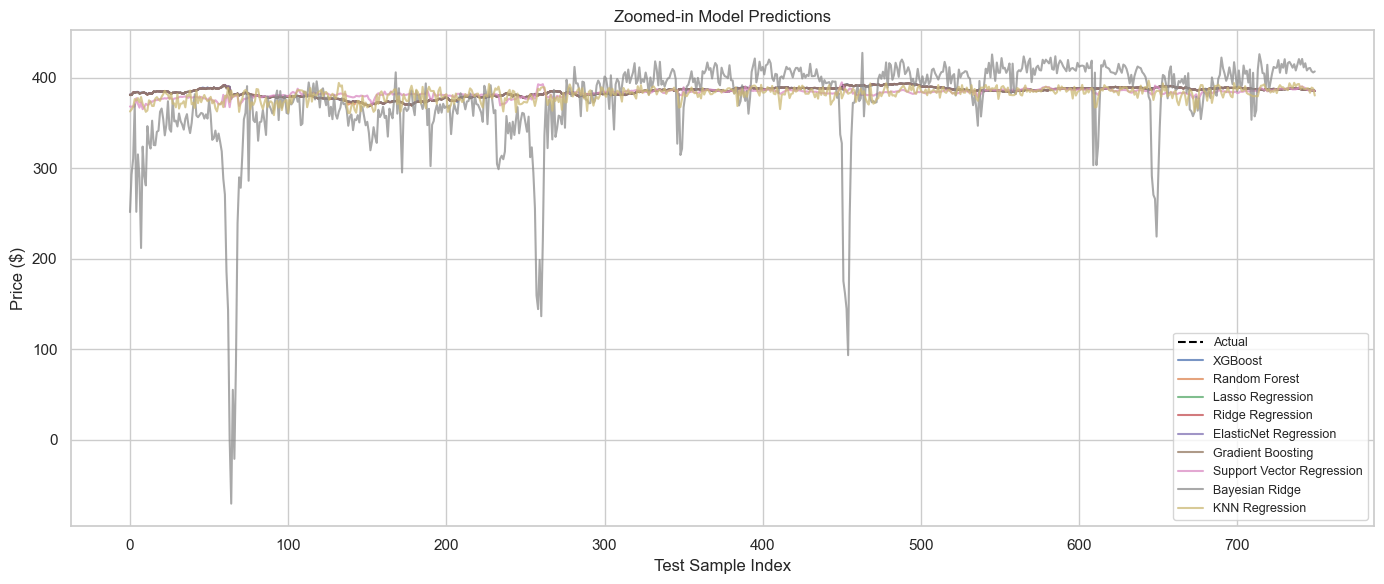

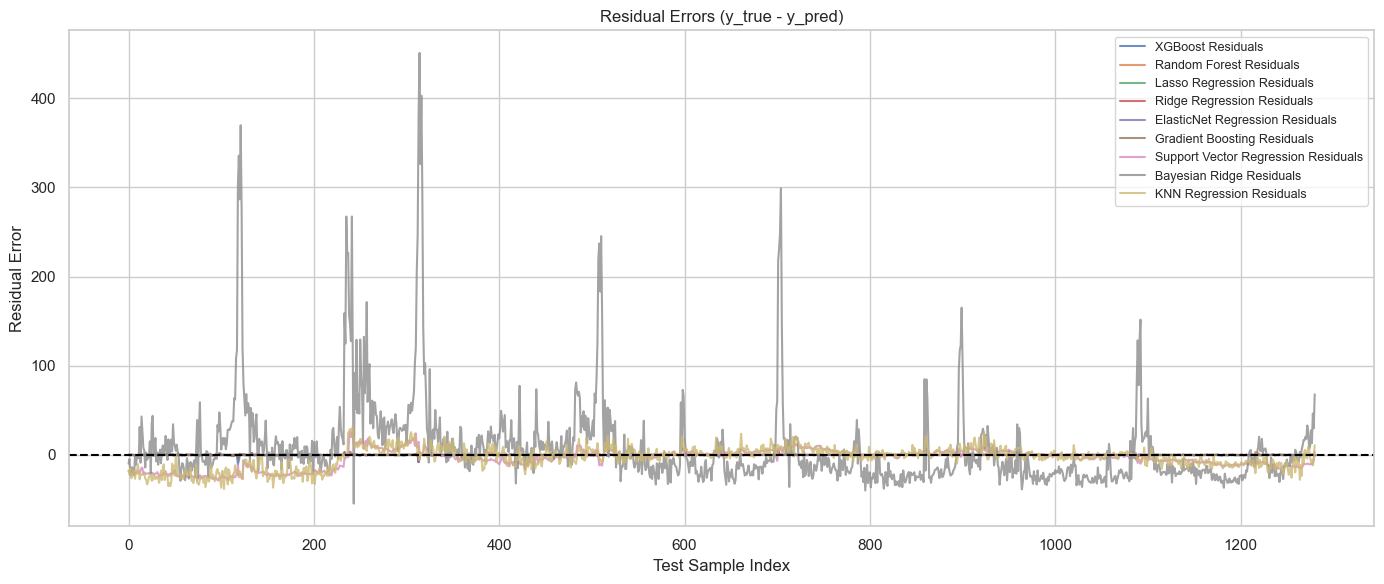

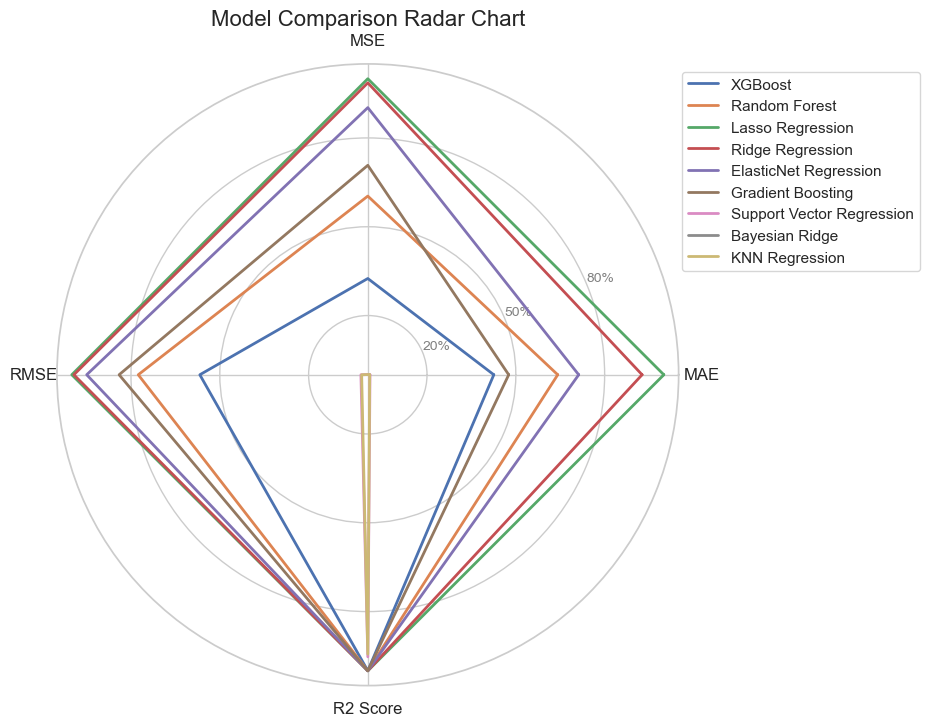

Model        MAE          MSE       RMSE   R2 Score
0                    XGBoost   0.198483     0.322537   0.567924   0.996984
1              Random Forest   0.132007     0.173772   0.416860   0.998375
2           Lasso Regression   0.084836     0.104878   0.323849   0.999019
3           Ridge Regression   0.091538     0.106372   0.326147   0.999005
4      ElasticNet Regression   0.118933     0.116227   0.340920   0.998913
5          Gradient Boosting   0.177625     0.148233   0.385011   0.998614
6  Support Vector Regression   8.090338   119.586244  10.935550  -0.118082
7             Bayesian Ridge  26.753982  2533.743926  50.336308 -22.689461
8             KNN Regression   8.866658   142.850736  11.952018  -0.335595

In [70]:
train_and_evaluate_extended_models(ticker='MSFT', alpha=0.1)

In [59]:
def train_and_evaluate_extended_models(ticker, target_col="Open", window_size=5, alpha=0.1, n_estimators=100, period="60d", interval="2m", scale_type="standard"):
    import pandas as pd
    import numpy as np
    import xgboost as xgb
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import Lasso, Ridge, ElasticNet, BayesianRidge
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    import matplotlib.pyplot as plt
    import seaborn as sns
    import yfinance as yf
    from math import pi

    sns.set(style='whitegrid')

    # Fetch stock data
    df = yf.download(ticker, period=period, interval=interval)
    df.columns = [i[0] for i in df.columns]

    # Technical Indicators
    def compute_rsi(data, window=14):
        delta = data.diff()
        gain = delta.clip(lower=0).rolling(window=window).mean()
        loss = -delta.clip(upper=0).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    def compute_macd(data, short_window=12, long_window=26, signal_window=9):
        short_ema = data.ewm(span=short_window, adjust=False).mean()
        long_ema = data.ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    df["SMA_10"] = df[target_col].rolling(window=10).mean()
    df["EMA_10"] = df[target_col].ewm(span=10, adjust=False).mean()
    df["RSI_14"] = compute_rsi(df[target_col])
    df["MACD"], df["Signal_Line"] = compute_macd(df[target_col])
    df.dropna(inplace=True)

    def create_sliding_window_data(df, target_col, window_size):
        feature_cols = [col for col in df.columns if col != target_col]
        X, y = [], []
        for i in range(len(df) - window_size):
            X.append(df.iloc[i : i + window_size][feature_cols].values)
            y.append(df.iloc[i + window_size][target_col])
        return np.array(X), np.array(y)

    X, y = create_sliding_window_data(df, target_col, window_size)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    X_train_flat = np.nan_to_num(X_train.reshape(X_train.shape[0], -1).astype(np.float32))
    X_test_flat = np.nan_to_num(X_test.reshape(X_test.shape[0], -1).astype(np.float32))

    if scale_type == "standard":
        scaler = StandardScaler()
    elif scale_type == "minmax":
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scale_type. Choose 'standard' or 'minmax'")

    X_train_flat = scaler.fit_transform(X_train_flat)
    X_test_flat = scaler.transform(X_test_flat)

    models = {
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=n_estimators, tree_method="hist", random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
        "Lasso Regression": Lasso(alpha=alpha),
        "Ridge Regression": Ridge(alpha=alpha),
        "ElasticNet Regression": ElasticNet(alpha=alpha, l1_ratio=0.5),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=n_estimators, random_state=42),
        "Support Vector Regression": SVR(kernel='rbf', C=100, epsilon=0.1),
        "Bayesian Ridge": BayesianRidge(),
        "KNN Regression": KNeighborsRegressor(n_neighbors=3)
    }

    performance_metrics = {"Model": [], "MAE": [], "MSE": [], "RMSE": [], "R2 Score": []}
    training_losses = {}
    predictions = {}

    for name, model in models.items():
        try:
            model.fit(X_train_flat, y_train)
            preds = model.predict(X_test_flat)
            predictions[name] = preds
            training_losses[name] = mean_squared_error(y_train, model.predict(X_train_flat))
            performance_metrics["Model"].append(name)
            performance_metrics["MAE"].append(mean_absolute_error(y_test, preds))
            performance_metrics["MSE"].append(mean_squared_error(y_test, preds))
            performance_metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, preds)))
            performance_metrics["R2 Score"].append(r2_score(y_test, preds))
        except Exception as e:
            print(f"Error training {name}: {e}")

    performance_df = pd.DataFrame(performance_metrics)
    print(performance_df)

    # Training Loss
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(training_losses.keys()), y=list(training_losses.values()), palette="crest")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Training Loss (MSE)")
    plt.title("Training Loss per Model")
    plt.tight_layout()
    plt.show()

    # Actual vs Predictions
    plt.figure(figsize=(16, 8))
    plt.plot(y_test, label="Actual Price", color="black", linestyle="--", linewidth=2)
    for name, preds in predictions.items():
        mae = mean_absolute_error(y_test, preds)
        plt.plot(preds, label=f"{name} (MAE: {mae:.2f})", alpha=0.75)
    plt.title(f"Model Predictions on Test Set ({ticker})")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Price ($)")
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Zoomed-in Plot
    zoom_range = slice(250, 1000)
    plt.figure(figsize=(14, 6))
    plt.plot(y_test[zoom_range], label="Actual", color="black", linestyle="--")
    for name, preds in predictions.items():
        plt.plot(preds[zoom_range], label=name, alpha=0.75)
    plt.title("Zoomed-in Model Predictions")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Price ($)")
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()

    # Residuals Plot
    plt.figure(figsize=(14, 6))
    for name, preds in predictions.items():
        residuals = y_test - preds
        plt.plot(residuals, label=f"{name} Residuals", alpha=0.8)
    plt.axhline(0, color="black", linestyle="--")
    plt.title("Residual Errors (y_true - y_pred)")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Residual Error")
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()

    # Radar Chart
    normalized_df = performance_df.copy()
    normalized_df.set_index("Model", inplace=True)

    for col in ["MAE", "MSE", "RMSE"]:
        normalized_df[col] = 1 / (normalized_df[col] + 1e-5)
    normalized_df = (normalized_df - normalized_df.min()) / (normalized_df.max() - normalized_df.min())

    radar_df = normalized_df.T
    labels = radar_df.index.tolist()
    angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))] + [0]

    plt.figure(figsize=(10, 10))
    for model in radar_df.columns:
        values = radar_df[model].tolist() + [radar_df[model].tolist()[0]]
        plt.polar(angles, values, label=model, linewidth=2)

    plt.xticks(angles[:-1], labels, fontsize=12)
    plt.yticks([0.2, 0.5, 0.8], ["20%", "50%", "80%"], color="grey", size=10)
    plt.title("Model Comparison Radar Chart", fontsize=16)
    plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1.0))
    plt.tight_layout()
    plt.show()

    return performance_df


[*********************100%***********************]  1 of 1 completed
C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.349e+01, tolerance: 4.573e+01
  model = cd_fast.enet_coordinate_descent(


                       Model       MAE       MSE      RMSE  R2 Score
0                    XGBoost  0.210712  0.328019  0.572729  0.996947
1              Random Forest  0.134502  0.179469  0.423638  0.998330
2           Lasso Regression  0.137052  0.123664  0.351658  0.998849
3           Ridge Regression  0.089742  0.106149  0.325805  0.999012
4      ElasticNet Regression  0.482303  0.612862  0.782855  0.994296
5          Gradient Boosting  0.176887  0.153859  0.392249  0.998568
6  Support Vector Regression  0.440438  2.252302  1.500767  0.979038
7             Bayesian Ridge  0.090194  0.106261  0.325978  0.999011
8             KNN Regression  1.489356  6.018138  2.453189  0.943991


C:\Users\shubb\AppData\Local\Temp\ipykernel_35124\866522291.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_losses.keys()), y=list(training_losses.values()), palette="crest")


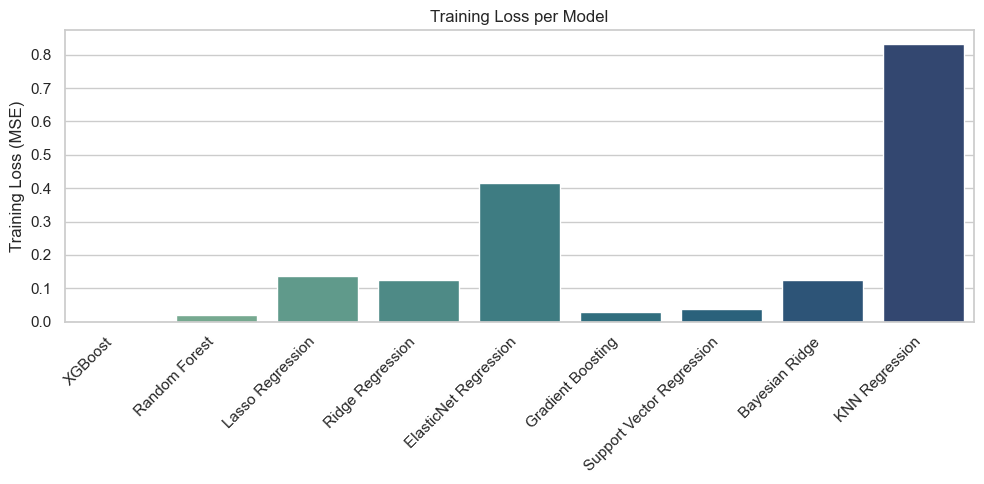

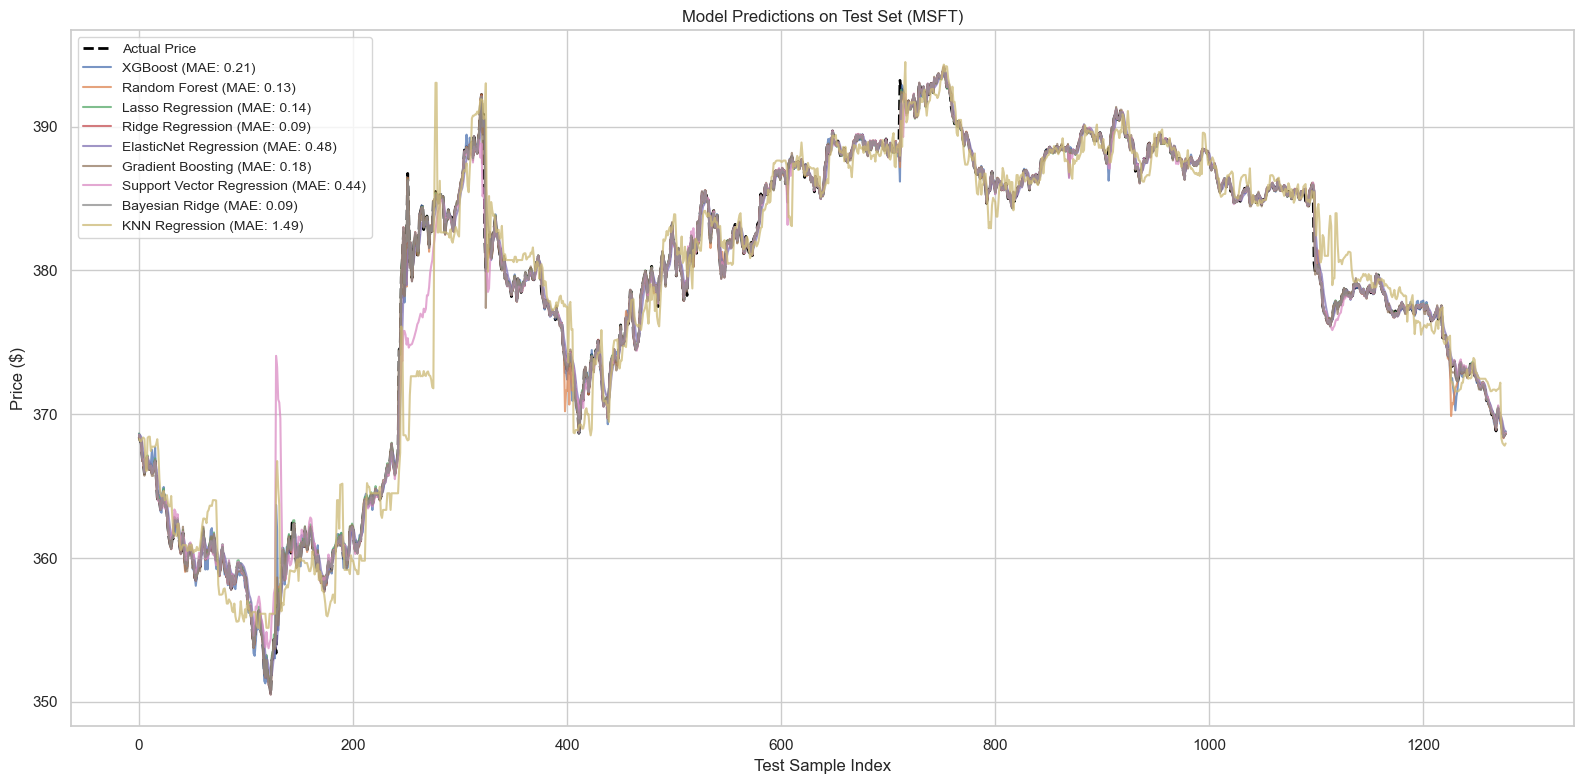

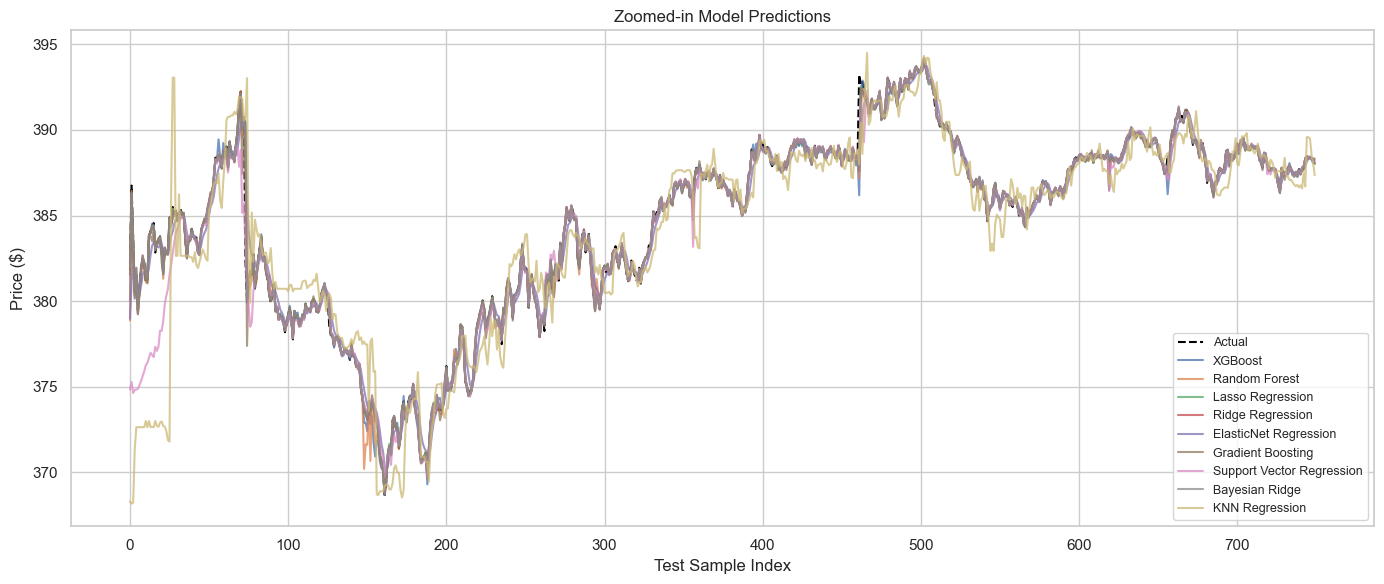

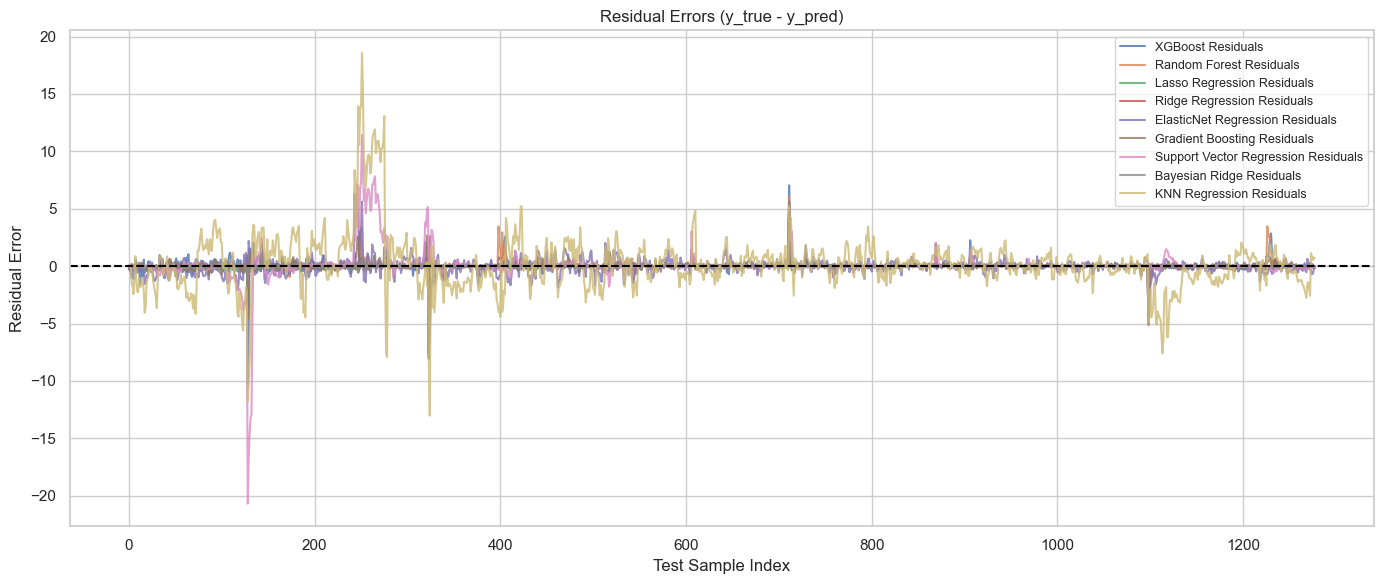

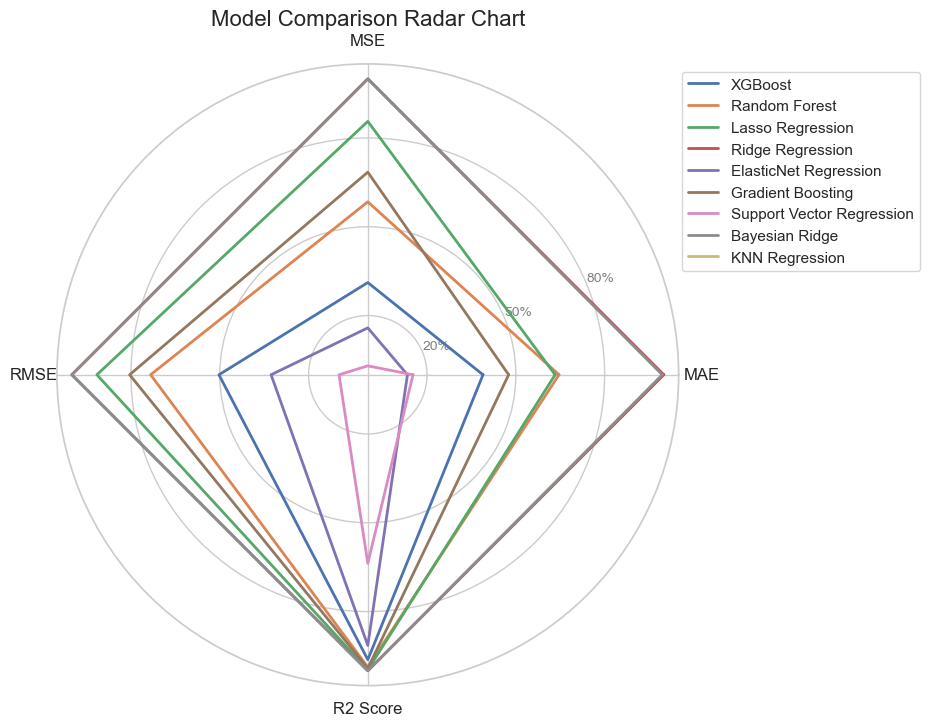

Model       MAE       MSE      RMSE  R2 Score
0                    XGBoost  0.210712  0.328019  0.572729  0.996947
1              Random Forest  0.134502  0.179469  0.423638  0.998330
2           Lasso Regression  0.137052  0.123664  0.351658  0.998849
3           Ridge Regression  0.089742  0.106149  0.325805  0.999012
4      ElasticNet Regression  0.482303  0.612862  0.782855  0.994296
5          Gradient Boosting  0.176887  0.153859  0.392249  0.998568
6  Support Vector Regression  0.440438  2.252302  1.500767  0.979038
7             Bayesian Ridge  0.090194  0.106261  0.325978  0.999011
8             KNN Regression  1.489356  6.018138  2.453189  0.943991

In [60]:
train_and_evaluate_extended_models(ticker='MSFT', alpha=0.1)


[*********************100%***********************]  1 of 1 completed
C:\Users\shubb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.473e+01, tolerance: 4.604e+01
  model = cd_fast.enet_coordinate_descent(


                       Model       MAE       MSE      RMSE  R2 Score
0                    XGBoost  0.205268  0.299321  0.547102  0.997199
1              Random Forest  0.132600  0.172686  0.415555  0.998384
2           Lasso Regression  0.136786  0.123512  0.351443  0.998844
3           Ridge Regression  0.089593  0.105962  0.325518  0.999009
4      ElasticNet Regression  0.480259  0.611442  0.781948  0.994279
5          Gradient Boosting  0.176725  0.160977  0.401219  0.998494
6  Support Vector Regression  0.440337  2.249137  1.499712  0.978955
7  Bayesian Ridge Regression  0.089613  0.105993  0.325565  0.999008
8             KNN Regression  1.485251  5.994462  2.448359  0.943911


C:\Users\shubb\AppData\Local\Temp\ipykernel_35124\4124641898.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_losses.keys()), y=list(training_losses.values()), palette="crest")


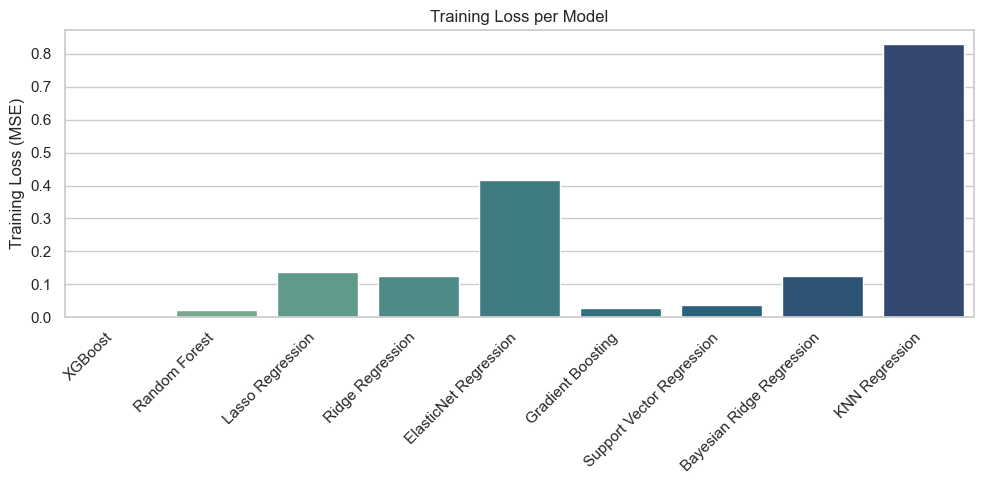

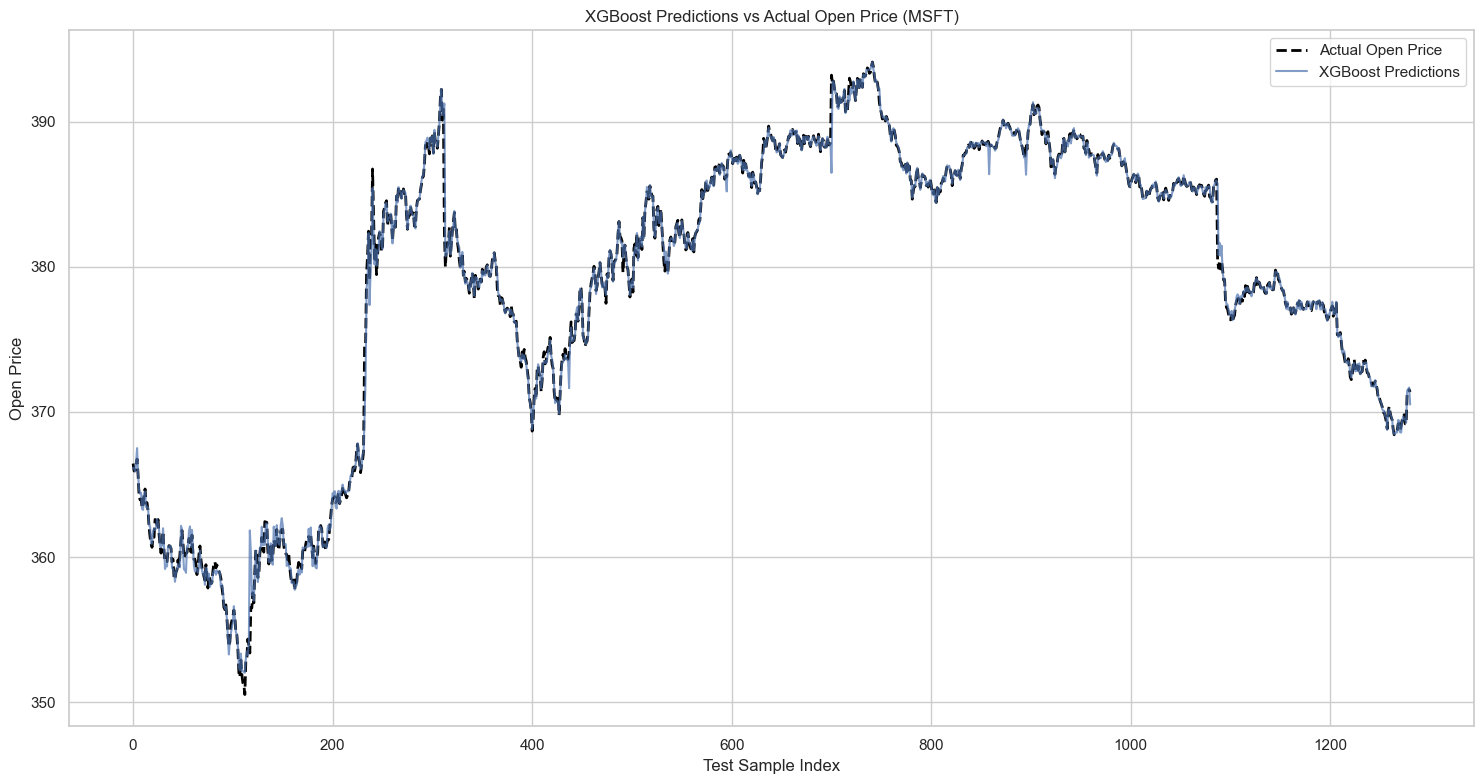

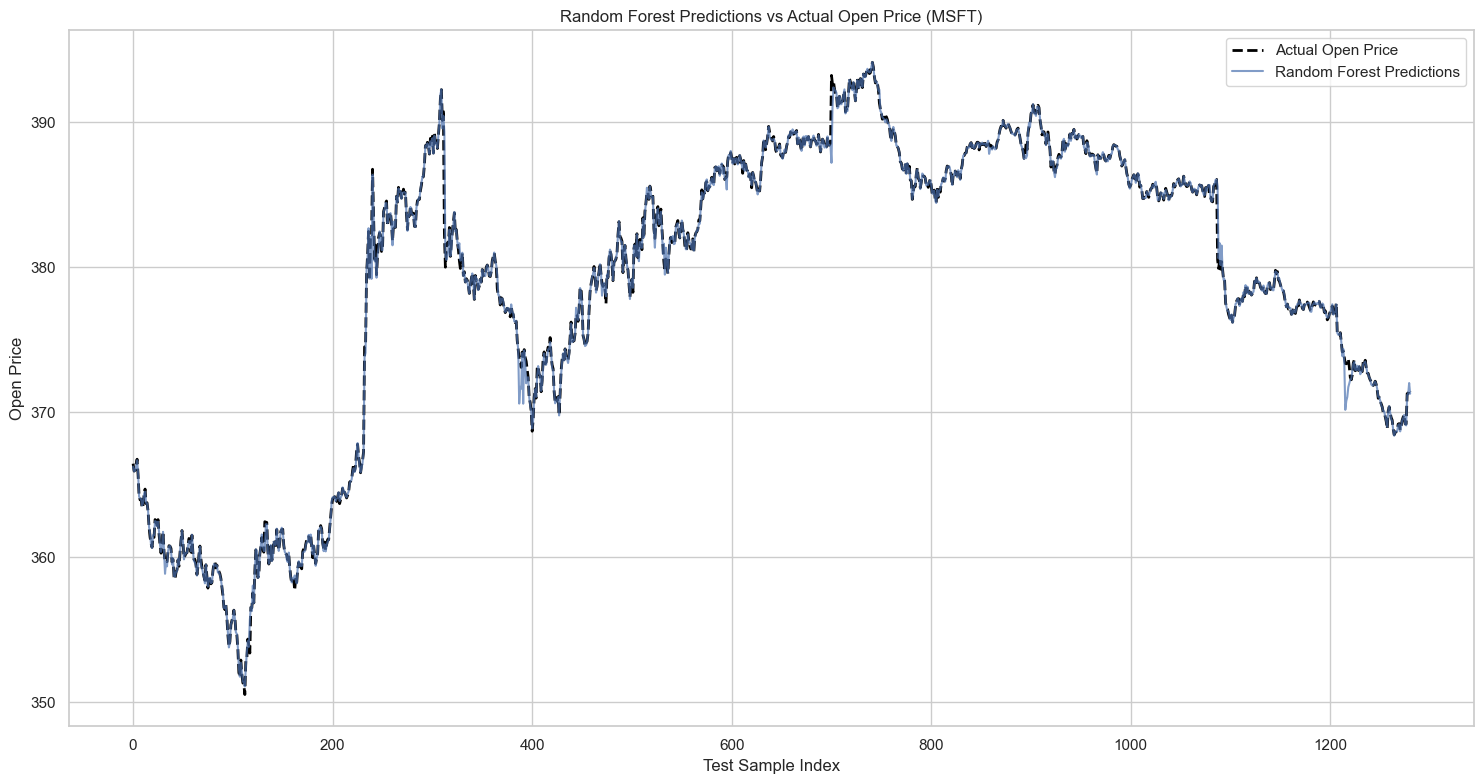

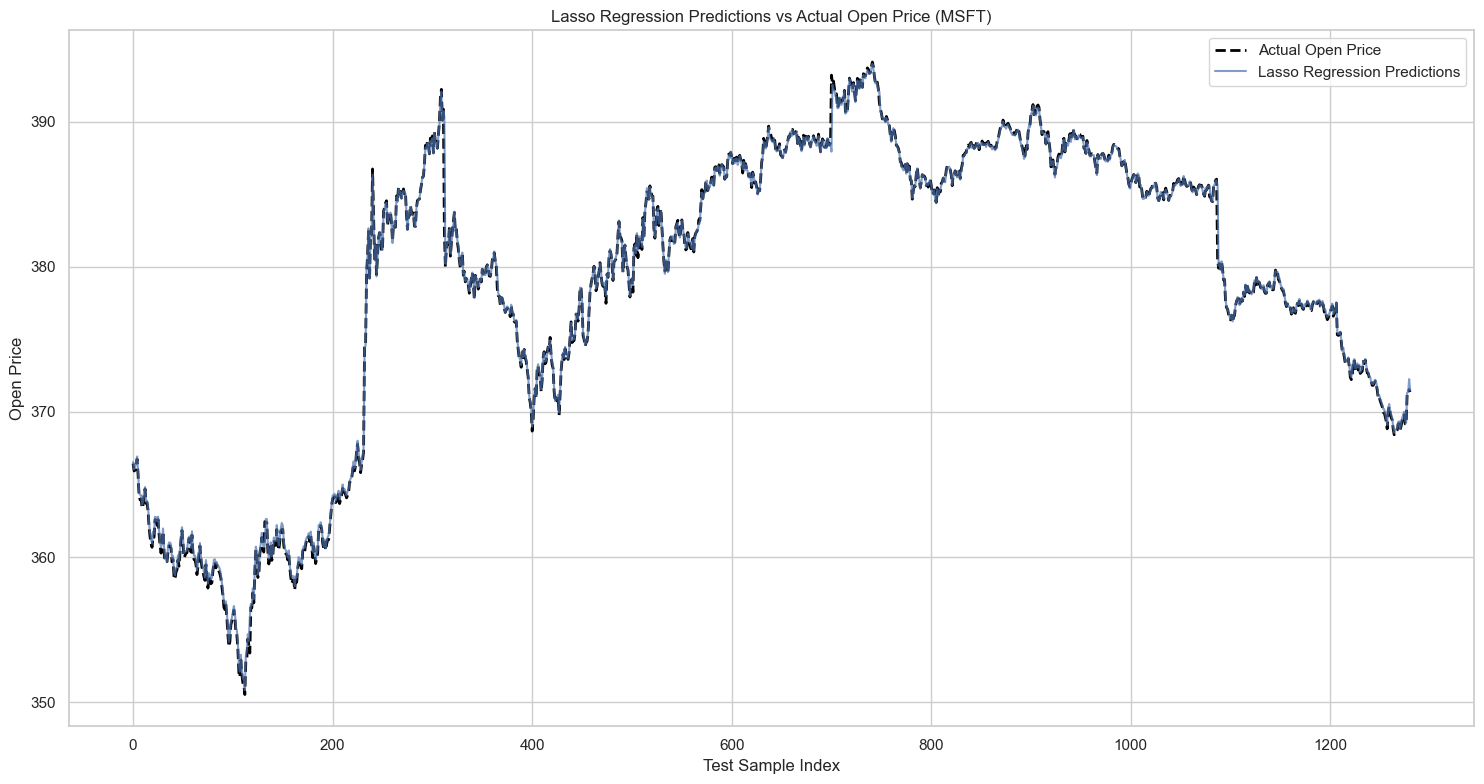

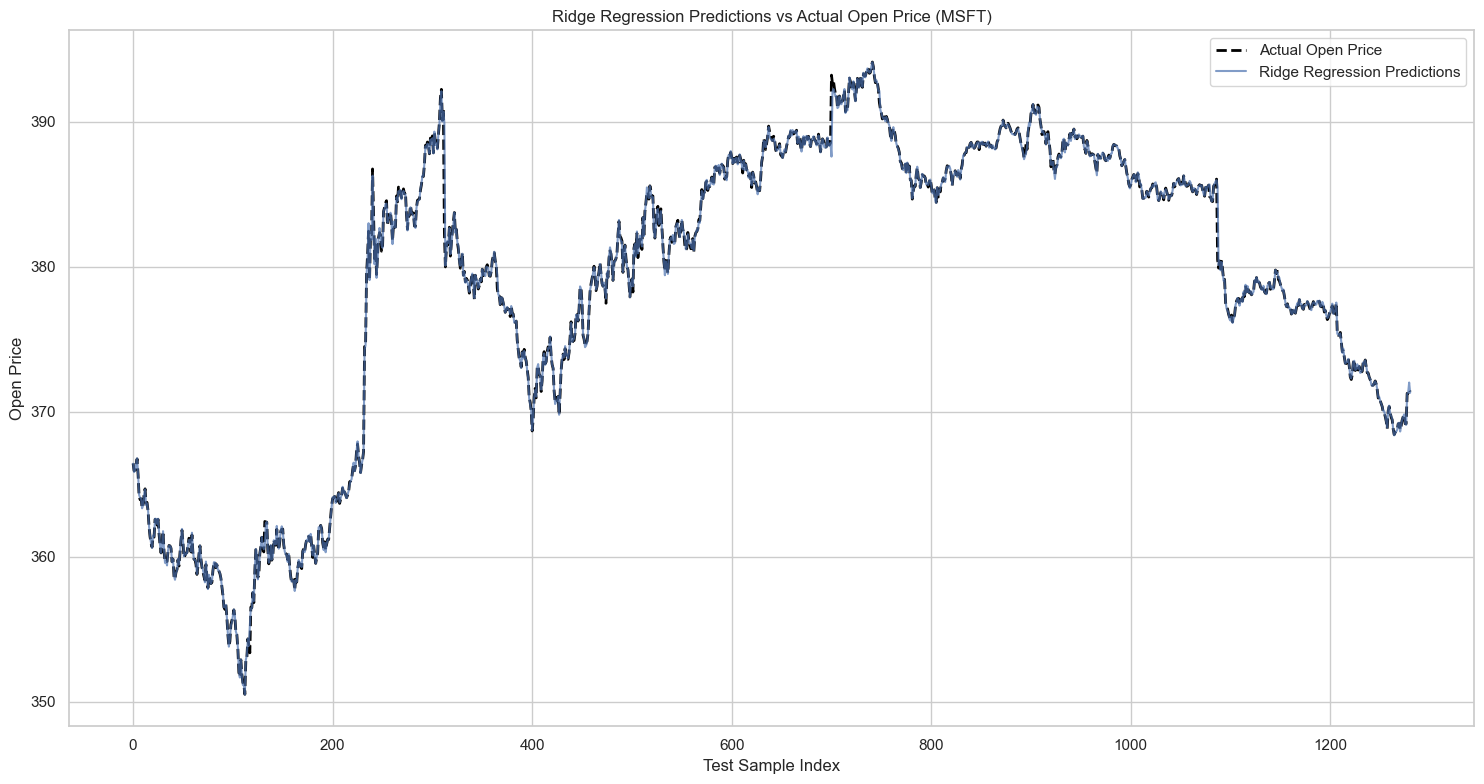

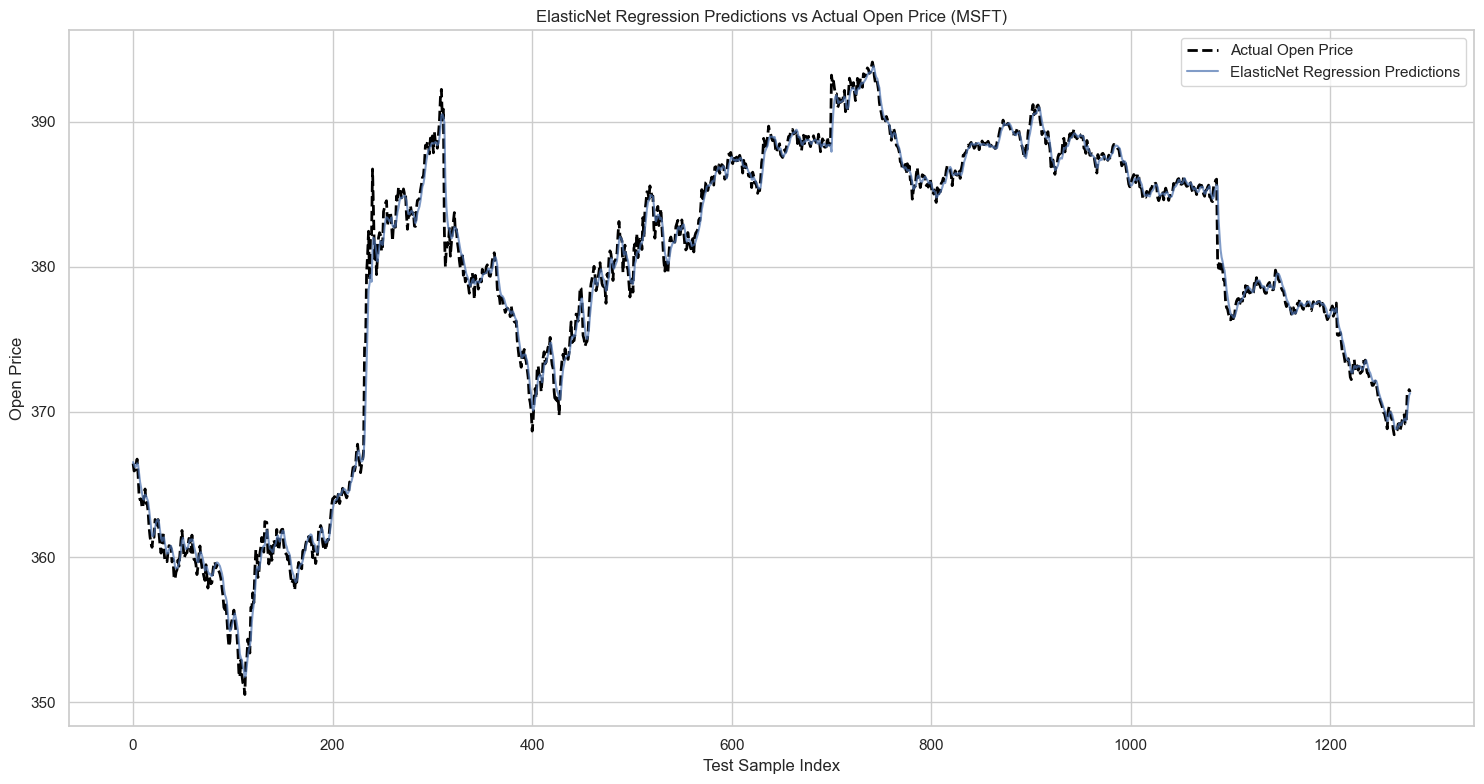

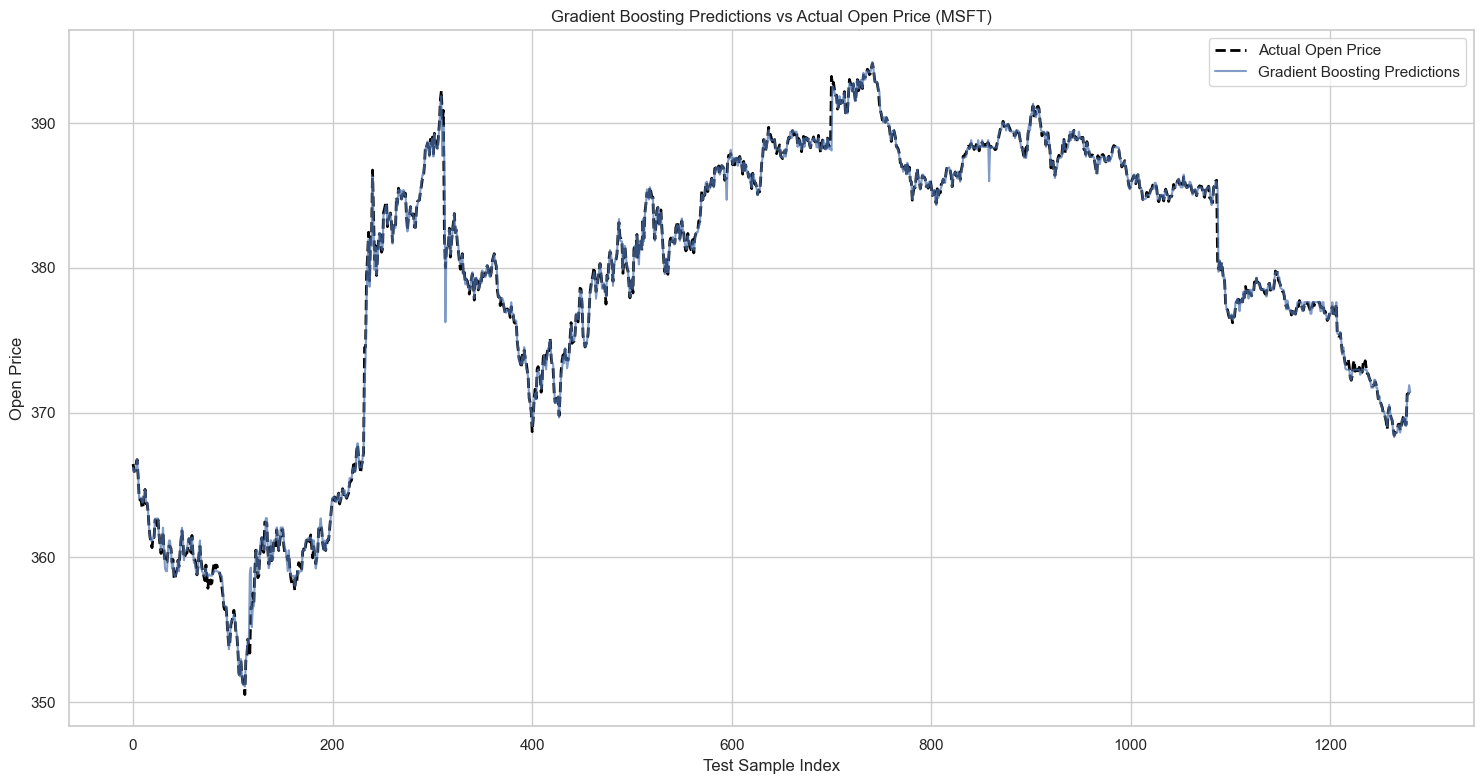

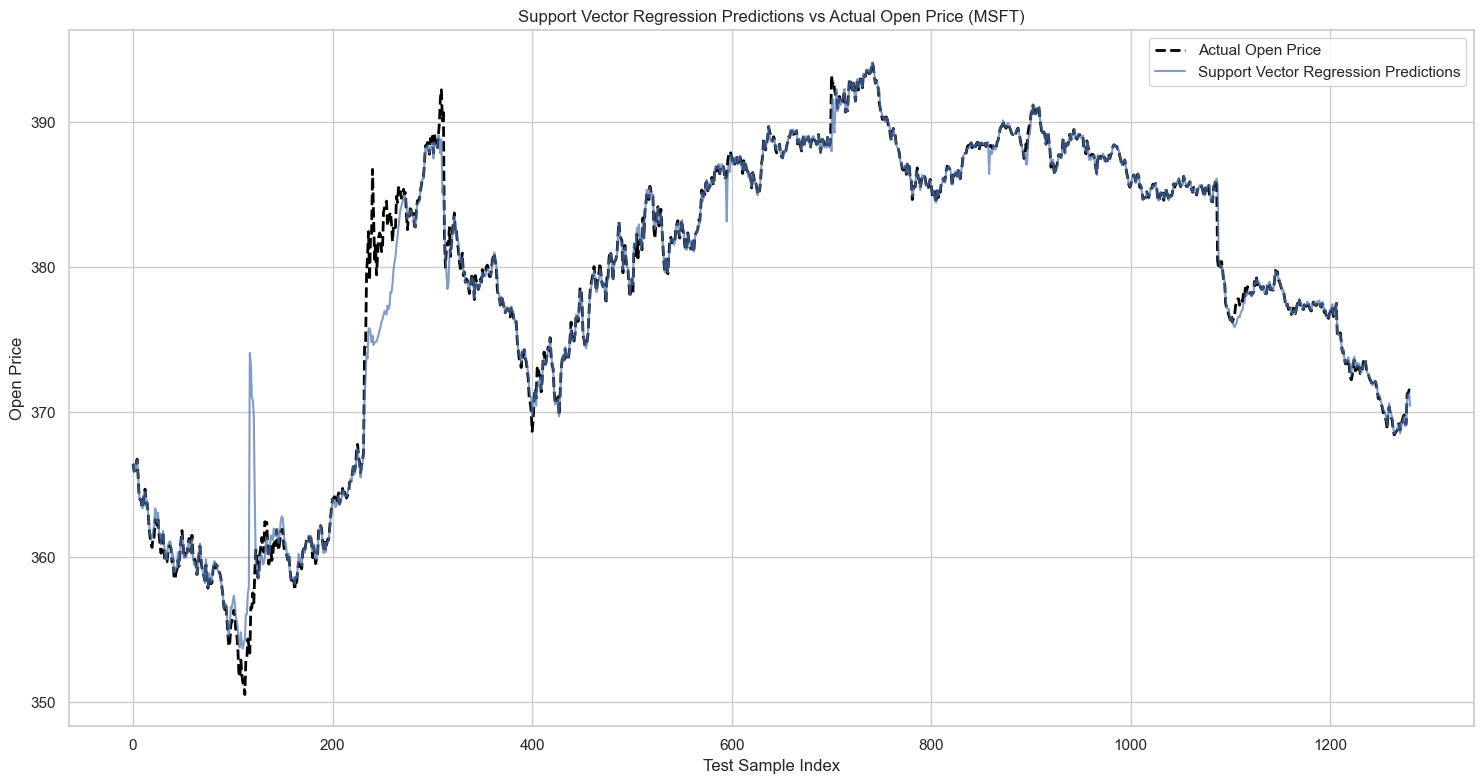

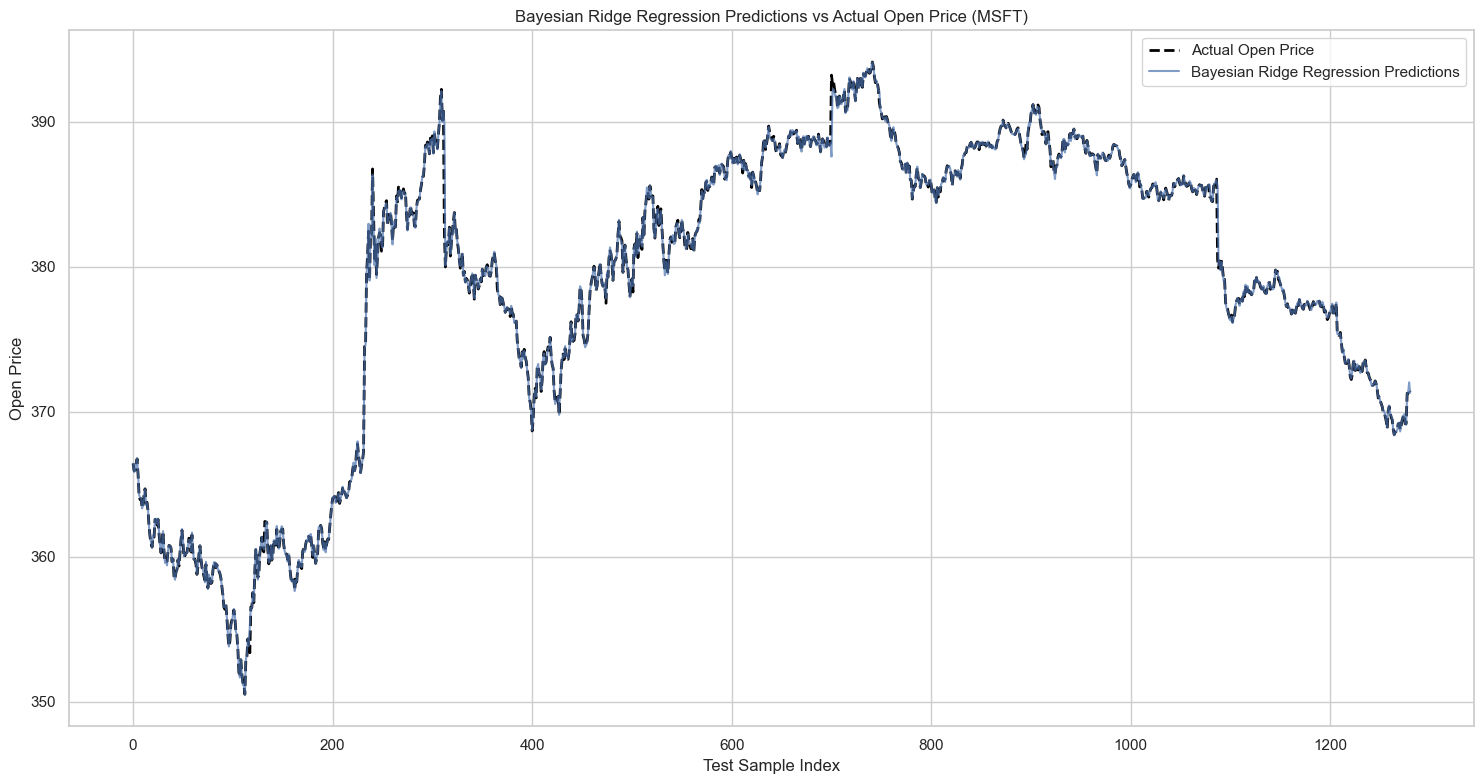

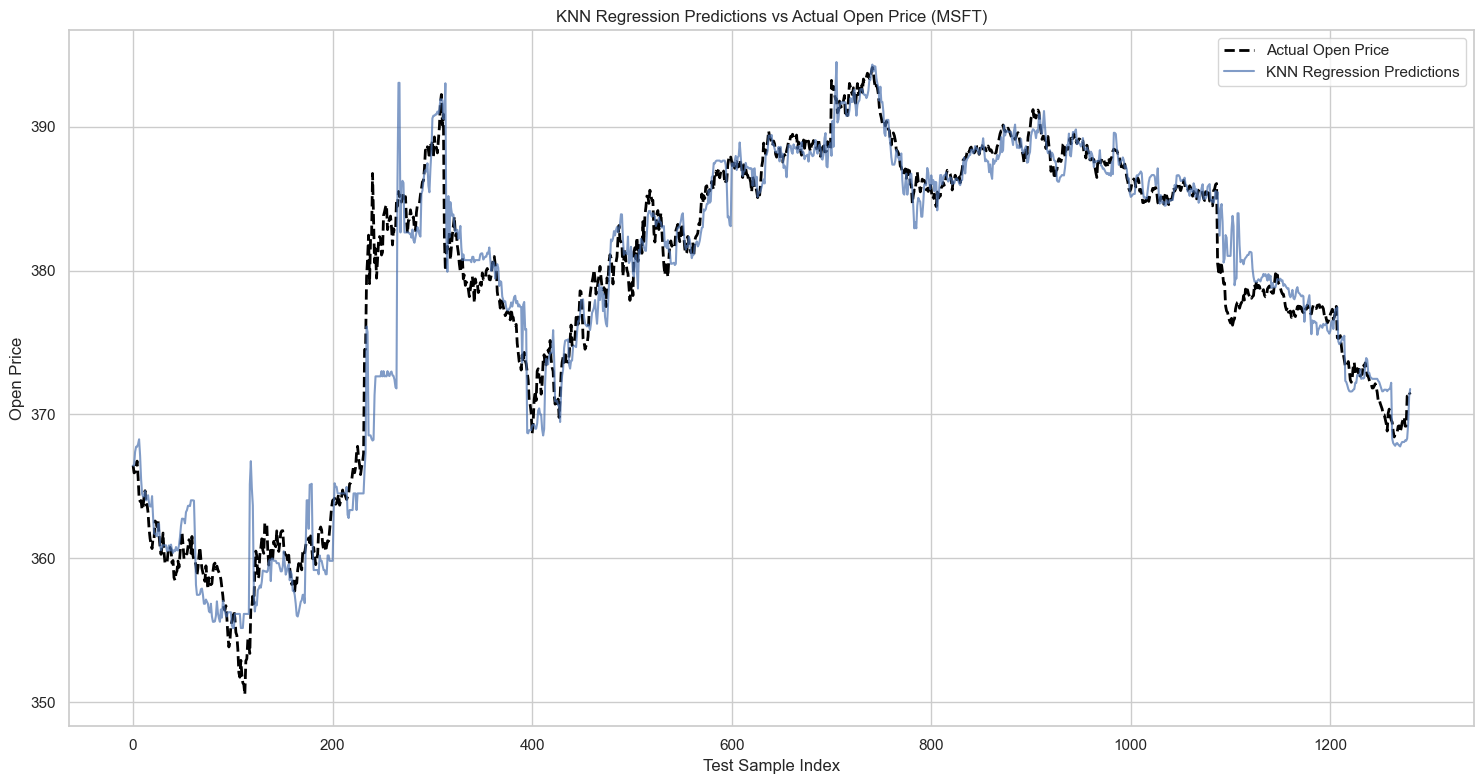

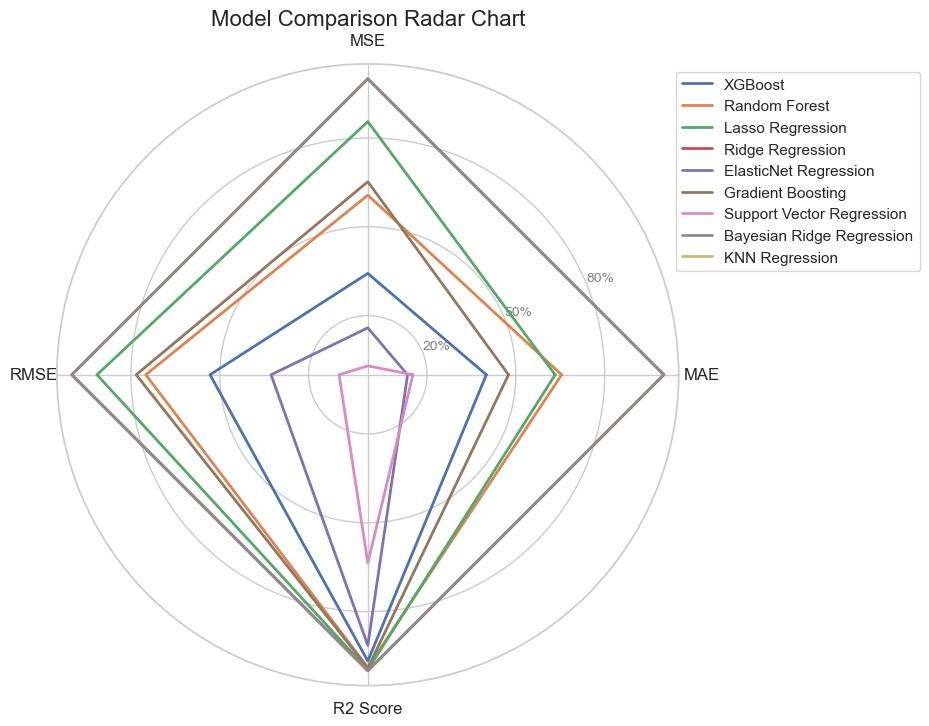

Model       MAE       MSE      RMSE  R2 Score
0                    XGBoost  0.205268  0.299321  0.547102  0.997199
1              Random Forest  0.132600  0.172686  0.415555  0.998384
2           Lasso Regression  0.136786  0.123512  0.351443  0.998844
3           Ridge Regression  0.089593  0.105962  0.325518  0.999009
4      ElasticNet Regression  0.480259  0.611442  0.781948  0.994279
5          Gradient Boosting  0.176725  0.160977  0.401219  0.998494
6  Support Vector Regression  0.440337  2.249137  1.499712  0.978955
7  Bayesian Ridge Regression  0.089613  0.105993  0.325565  0.999008
8             KNN Regression  1.485251  5.994462  2.448359  0.943911

In [73]:
from sklearn.linear_model import Ridge, ElasticNet, BayesianRidge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf
import xgboost as xgb
from math import pi

def train_and_evaluate_extended_models(ticker, target_col="Open", window_size=5, alpha=0.1, n_estimators=100, period="60d", interval="2m", scale_type="standard"):
    sns.set(style='whitegrid')

    df = yf.download(ticker, period=period, interval=interval)
    df.columns = [i[0] for i in df.columns]

    def compute_rsi(data, window=14):
        delta = data.diff()
        gain = delta.clip(lower=0).rolling(window=window).mean()
        loss = -delta.clip(upper=0).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    def compute_macd(data, short_window=12, long_window=26, signal_window=9):
        short_ema = data.ewm(span=short_window, adjust=False).mean()
        long_ema = data.ewm(span=long_window, adjust=False).mean()
        macd = short_ema - long_ema
        signal_line = macd.ewm(span=signal_window, adjust=False).mean()
        return macd, signal_line

    df["SMA_10"] = df[target_col].rolling(window=10).mean()
    df["EMA_10"] = df[target_col].ewm(span=10, adjust=False).mean()
    df["RSI_14"] = compute_rsi(df[target_col])
    df["MACD"], df["Signal_Line"] = compute_macd(df[target_col])
    df.dropna(inplace=True)

    def create_sliding_window_data(df, target_col, window_size):
        feature_cols = [col for col in df.columns if col != target_col]
        X, y = [], []
        for i in range(len(df) - window_size):
            X.append(df.iloc[i : i + window_size][feature_cols].values)
            y.append(df.iloc[i + window_size][target_col])
        return np.array(X), np.array(y)

    X, y = create_sliding_window_data(df, target_col, window_size)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    X_train_flat = np.nan_to_num(X_train.reshape(X_train.shape[0], -1).astype(np.float32))
    X_test_flat = np.nan_to_num(X_test.reshape(X_test.shape[0], -1).astype(np.float32))

    if scale_type == "standard":
        scaler = StandardScaler()
    elif scale_type == "minmax":
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scale_type. Choose 'standard' or 'minmax'")

    X_train_flat = scaler.fit_transform(X_train_flat)
    X_test_flat = scaler.transform(X_test_flat)
    joblib.dump(scaler, "scaler.pkl")

    models = {
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=n_estimators, tree_method="hist", random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
        "Lasso Regression": Lasso(alpha=alpha),
        "Ridge Regression": Ridge(alpha=alpha),
        "ElasticNet Regression": ElasticNet(alpha=alpha, l1_ratio=0.5),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=n_estimators, random_state=42),
        "Support Vector Regression": SVR(kernel='rbf', C=100, epsilon=0.1),
        "Bayesian Ridge Regression": BayesianRidge(),
        "KNN Regression": KNeighborsRegressor(n_neighbors=3)
    }

    performance_metrics = {"Model": [], "MAE": [], "MSE": [], "RMSE": [], "R2 Score": []}
    training_losses = {}
    predictions = {}

    for name, model in models.items():
        try:
            model.fit(X_train_flat, y_train)
            preds = model.predict(X_test_flat)
            predictions[name] = preds
            training_losses[name] = mean_squared_error(y_train, model.predict(X_train_flat))
            performance_metrics["Model"].append(name)
            performance_metrics["MAE"].append(mean_absolute_error(y_test, preds))
            performance_metrics["MSE"].append(mean_squared_error(y_test, preds))
            performance_metrics["RMSE"].append(np.sqrt(mean_squared_error(y_test, preds)))
            performance_metrics["R2 Score"].append(r2_score(y_test, preds))
            if name in ["Lasso Regression", "Ridge Regression", "ElasticNet Regression"]:
                joblib.dump(model, f"{name.replace(' ', '_').lower()}.pkl")
        except Exception as e:
            print(f"Error training {name}: {e}")

    performance_df = pd.DataFrame(performance_metrics)
    print(performance_df)

    # Training Loss
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(training_losses.keys()), y=list(training_losses.values()), palette="crest")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Training Loss (MSE)")
    plt.title("Training Loss per Model")
    plt.tight_layout()
    plt.show()

    # Individual Model Predictions
    for name, preds in predictions.items():
        plt.figure(figsize=(15, 8))
        plt.plot(y_test, label="Actual Open Price", color="black", linewidth=2, linestyle="dashed")
        plt.plot(preds, label=f"{name} Predictions", alpha=0.7)
        plt.xlabel("Test Sample Index")
        plt.ylabel("Open Price")
        plt.title(f"{name} Predictions vs Actual Open Price ({ticker})")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Radar Chart
    normalized_df = performance_df.copy()
    normalized_df.set_index("Model", inplace=True)

    for col in ["MAE", "MSE", "RMSE"]:
        normalized_df[col] = 1 / (normalized_df[col] + 1e-5)
    normalized_df = (normalized_df - normalized_df.min()) / (normalized_df.max() - normalized_df.min())

    radar_df = normalized_df.T
    labels = radar_df.index.tolist()
    angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))] + [0]

    plt.figure(figsize=(10, 10))
    for model in radar_df.columns:
        values = radar_df[model].tolist() + [radar_df[model].tolist()[0]]
        plt.polar(angles, values, label=model, linewidth=2)

    plt.xticks(angles[:-1], labels, fontsize=12)
    plt.yticks([0.2, 0.5, 0.8], ["20%", "50%", "80%"], color="grey", size=10)
    plt.title("Model Comparison Radar Chart", fontsize=16)
    plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1.0))
    plt.tight_layout()
    plt.show()

    return performance_df

train_and_evaluate_extended_models(ticker='MSFT', alpha=0.1)


In [62]:
df = yf.download('MSFT', period='60d', interval='2m')
df.tail()

[*********************100%***********************]  1 of 1 completed


Price                           Close        High         Low        Open  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Datetime                                                                    
2025-04-16 19:30:00+00:00  368.750000  369.279999  368.649994  368.649994   
2025-04-16 19:32:00+00:00  369.165009  369.649994  368.750000  368.750000   
2025-04-16 19:34:00+00:00  369.200012  369.510010  369.059998  369.170013   
2025-04-16 19:36:00+00:00  368.649994  369.250000  368.410004  369.204987   
2025-04-16 19:38:00+00:00  368.760010  368.760010  368.760010  368.760010   

Price                      Volume  
Ticker                       MSFT  
Datetime                           
2025-04-16 19:30:00+00:00  153275  
2025-04-16 19:32:00+00:00  137498  
2025-04-16 19:34:00+00:00  115040  
2025-04-16 19:36:00+00:00  143740  
2025-04-16 19:38:00+00:00       0

# I need to load the models and check their performances on unseen data from 3/21/2025

In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def compute_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

def create_sliding_window_data(df, target_col, window_size):
    feature_cols = [col for col in df.columns if col != target_col]
    X, y = [], []

    for i in range(len(df) - window_size):
        X.append(df.iloc[i : i + window_size][feature_cols].values)  # Past `window_size` records
        y.append(df.iloc[i + window_size][target_col])  # Next step's Open price

    return np.array(X), np.array(y)

def test_all_trained_models_on_unseen_data(ticker, target_col="Open", window_size=5, start_date="2025-03-21"):
    import yfinance as yf
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import joblib
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # Download unseen data
    df = yf.download(ticker, start=start_date, interval="2m")
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

    # Compute technical indicators
    df["SMA_10"] = df[target_col].rolling(window=10).mean()
    df["EMA_10"] = df[target_col].ewm(span=10, adjust=False).mean()
    df["RSI_14"] = compute_rsi(df[target_col], window=14)
    df["MACD"], df["Signal_Line"] = compute_macd(df[target_col])
    df.dropna(inplace=True)

    # Create sliding window dataset
    X_test, y_test = create_sliding_window_data(df, target_col, window_size)
    X_test_flat = X_test.reshape(X_test.shape[0], -1).astype(np.float32)
    X_test_flat = np.nan_to_num(X_test_flat)

    # Load saved scaler
    scaler = joblib.load("scaler.pkl")
    X_test_scaled = scaler.transform(X_test_flat)

    model_files = {
        "Ridge Regression": "ridge_regression.pkl",
        "Lasso Regression": "lasso_regression.pkl",
        "ElasticNet Regression": "elasticnet_regression.pkl"
    }

    # Store metrics
    performance = {"Model": [], "MAE": [], "MSE": [], "RMSE": [], "R2 Score": []}

    for name, file in model_files.items():
        try:
            model = joblib.load(file)
            preds = model.predict(X_test_scaled)

            # Metrics
            mae = mean_absolute_error(y_test, preds)
            mse = mean_squared_error(y_test, preds)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, preds)

            performance["Model"].append(name)
            performance["MAE"].append(mae)
            performance["MSE"].append(mse)
            performance["RMSE"].append(rmse)
            performance["R2 Score"].append(r2)

            print(f"\n{name} Performance:")
            print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

            # Plot
            plt.figure(figsize=(14, 6))
            plt.plot(y_test, label="Actual", linestyle="dashed", color="black")
            plt.plot(preds, label="Predicted", alpha=0.7)
            plt.title(f"{name} Prediction on Unseen Data ({ticker})")
            plt.xlabel("Sample Index")
            plt.ylabel("Open Price")
            plt.legend()
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(f"Failed for {name}: {e}")

    # Summary
    perf_df = pd.DataFrame(performance)
    print("\nPerformance Summary:")
    print(perf_df)

    return perf_df


[*********************100%***********************]  1 of 1 completed



Ridge Regression Performance:
MAE: 0.0407, MSE: 0.0343, RMSE: 0.1852, R2: 0.9974


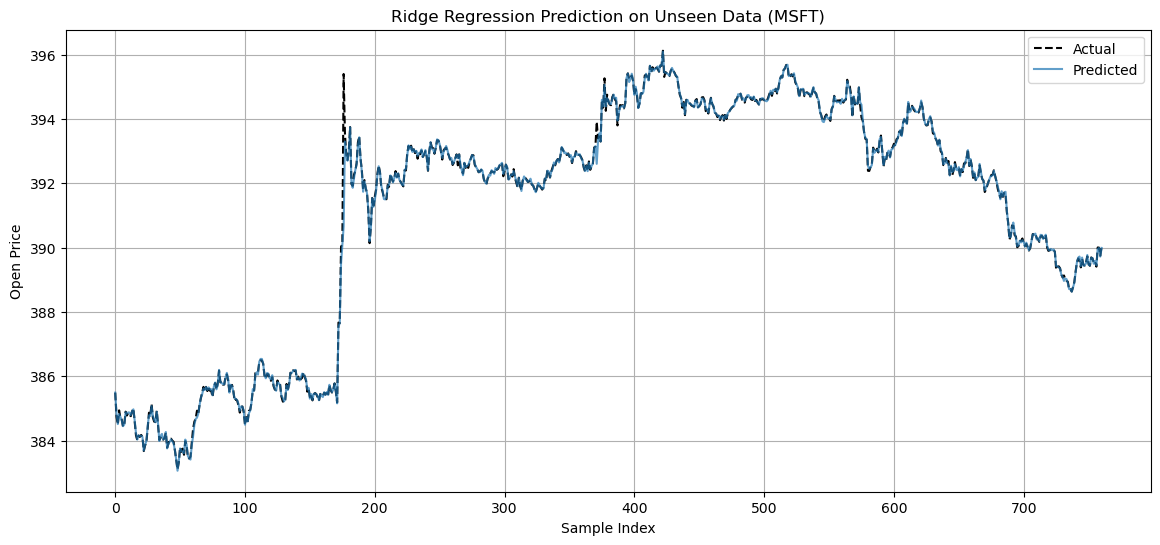


Lasso Regression Performance:
MAE: 0.0862, MSE: 0.0376, RMSE: 0.1938, R2: 0.9972


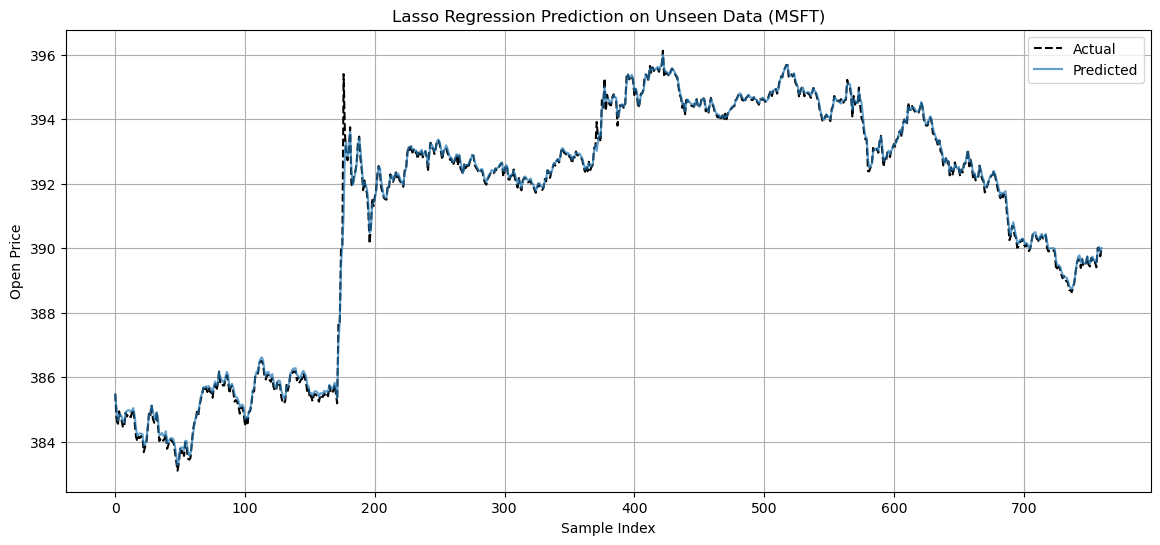


ElasticNet Regression Performance:
MAE: 0.2359, MSE: 0.1901, RMSE: 0.4360, R2: 0.9856


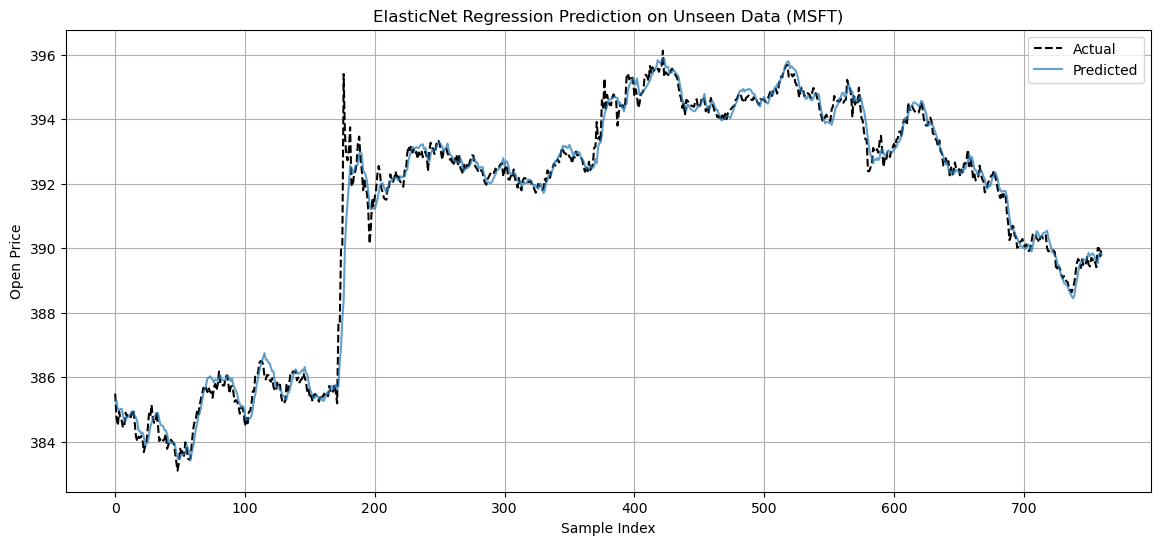


Performance Summary:
                   Model       MAE       MSE      RMSE  R2 Score
0       Ridge Regression  0.040661  0.034303  0.185210  0.997402
1       Lasso Regression  0.086247  0.037575  0.193844  0.997154
2  ElasticNet Regression  0.235924  0.190117  0.436024  0.985600


Model       MAE       MSE      RMSE  R2 Score
0       Ridge Regression  0.040661  0.034303  0.185210  0.997402
1       Lasso Regression  0.086247  0.037575  0.193844  0.997154
2  ElasticNet Regression  0.235924  0.190117  0.436024  0.985600

In [31]:
test_all_trained_models_on_unseen_data(ticker="MSFT")